# Data Analysis of FIFA 15-20


In this project we're going to analyse [the data of 6 FIFA Games](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset) collected and presented by [Stefano Leone](https://www.kaggle.com/stefanoleone992).

FIFA is a game released annually by Electronic Arts under the EA Sports label. As of 2011, the FIFA franchise has been localised into 18 languages and available in 51 countries. Listed in Guinness World Records as the best-selling sports video game franchise in the world, by 2019, the FIFA series had sold over 282.4 million copies. It is also one of the best-selling video game franchises...[Read More](https://en.wikipedia.org/wiki/FIFA_(video_game_series))

### **Brief description of the dataset:**
- Every player available in FIFA 15, 16, 17, 18, 19, and also FIFA 20
- 100+ attributes
- URL of the scraped player
- Player positions, with the role in the club and in the national team
- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
- Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

![FIFA](https://cdn.vox-cdn.com/thumbor/lTP0_tHaDU3IC0YXPdqzFTzZ97s=/0x150:7680x4171/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/12785703/FIFA19_ActiveTouch_Gen4.jpg)


### **Notebook Structure**
1. [Data Wrangling](#Data-Wrangling)
    1. [Gathering](#Gathering)
    2. [Assessing](#Assessing)
    3. [Cleaning](#Cleaning)
2. [Exploratory data analysis](#Exploratory-data-analysis)
3. [Prediction Models](#Prediction-Models)
    1. [OLS regression Model](#Overall-rating-prediction)
    2. [Classification Models](#Player-position-classification)
    3. [Summary](#Summary-of-Decision-Tree-vs-KNN-vs-SVM-for-player-postion-prediction)


**Our Aim:**
* Present a brief data analysis for each year from 2015 to 2020.
* Present a comparative analysis depicting the evolution of certain players from 2015 to 2020.
* Building models that predict players overall ratings and positions based on their attributes.

In [1]:
# Essential packages for analysis

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import display, HTML
from math import pi
plt.style.use('fivethirtyeight')

%matplotlib inline

# ML packages
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Input files path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import math

/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_15.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv


## Data Wrangling
The first step in this project is to wrangle the [fifa-20-complete-player-dataset](http://https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset) data. This procedure will be executed folowing the famous 3 steps of data wrangling:
1. Gathering
2. Assessing
3. Cleaning

In the first step we're going to import and read the data we're going to work with. Then, we're going to assess our data and note down any quality or tidiness issues. As a final step, we will define cleaning tasks and execute them to build our master dataset.

### Gathering

Since we're using data available on Kaggle, this step is reduced to simply importing and reading the data.

In [2]:
# Reading the .csv files from the input path

df15 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_15.csv')
df16 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_16.csv')
df17 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_17.csv')
df18 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_18.csv')
df19 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_19.csv')
df20 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')
display(df15.head(3))
display(df16.head(3))
display(df17.head(3))
display(df18.head(3))
display(df19.head(3))
display(df20.head(3))

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,...,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


### Assessing

In this step, we're going to assess the data we have and note every quality or tidiness issue, so that we would have a data set that is ready for cleaning and then exploring. The issues regarding the quality and tidiness of the data set we have are denoted at the end of the assessment section.


In [3]:
# Checking the shape of each dataframe

l = df15.shape,df16.shape,df17.shape,df18.shape,df19.shape,df20.shape
shape = pd.DataFrame(l)
shape.index = [2015,2016,2017,2018,2019,2020]
shape.columns = ['rows','columns']
shape

,rows,columns
2015,15465,104
2016,14881,104
2017,17009,104
2018,17592,104
2019,17770,104
2020,18278,104


#### Checking the column names

In [4]:
# Column names list

print(list(df15.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

To better understand the signification of the column names, we refer to the [sofifa](http://https://sofifa.com/) website where each player has a page containing all the informations that are present in the datasets we have. An example is shown below of the page of Lionel Messi:
![Messi page](https://snipboard.io/ulp0VP.jpg)

In [5]:
# Checking the NULL values in FIFA 20 dataframe

temp = df15.isna().sum().reset_index()
temp.columns = ['columns','na_nbr']
temp.query('na_nbr!=0')

,columns,na_nbr
22,release_clause_eur,15465
23,player_tags,14271
24,team_position,232
25,team_jersey_number,232
26,loaned_from,14553
27,joined,1151
28,contract_valid_until,239
29,nation_position,14409
30,nation_jersey_number,14409
31,pace,1703


**Checking for value types issues**

In [6]:
# Checking head values of each column

display(df17.head())
display(df17[['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']].head())
df17[['potential','value_eur','wage_eur','player_positions','preferred_foot','international_reputation','weak_foot',
      'skill_moves','work_rate','body_type','release_clause_eur','team_position','team_jersey_number','pace','shooting','passing','dribbling']].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys
0,84+2,93-2,87+1,82+1,88+1
1,77-3,95+2,71,88,85
2,75+3,89+1,62,81+3,83
3,15,13,25,55+7,11
4,77,94+4,77,83+1,88+1


,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,pace,shooting,passing,dribbling
0,94,87000000,340000,"LW, LM, ST",Right,5,4,5,High/Low,C. Ronaldo,NaN,LW,7.0,92.0,92.0,81.0,91.0
1,93,89000000,340000,RW,Left,5,4,4,Medium/Medium,Messi,NaN,RW,10.0,89.0,90.0,86.0,96.0
2,95,109000000,260000,LW,Right,5,5,5,High/Medium,Neymar,NaN,LW,11.0,91.0,84.0,78.0,95.0
3,92,69500000,240000,GK,Right,5,4,1,Medium/Medium,Normal,NaN,GK,1.0,NaN,NaN,NaN,NaN
4,92,83000000,255000,ST,Right,5,4,4,High/Medium,Normal,NaN,ST,9.0,82.0,90.0,79.0,87.0


In [7]:
display(df16['body_type'].value_counts())

Normal        8920
Lean          5058
Stocky         897
Shaqiri          1
Akinfenwa        1
C. Ronaldo       1
Neymar           1
Messi            1
Courtois         1
Name: body_type, dtype: int64

In [8]:
df20.team_position.value_counts()

SUB    7820
RES    2958
GK      662
LCB     660
RCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
LS      195
RS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
LAM      23
RAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [9]:
df15.player_traits.value_counts().index

Index(['Injury Prone', 'Speed Dribbler (CPU AI Only)', 'Power Header',
       'Long Shot Taker (CPU AI Only)', 'Technical Dribbler (CPU AI Only)',
       'Dives Into Tackles (CPU AI Only)', 'Playmaker (CPU AI Only)',
       'Long Throw-in', 'Puncher', 'Beat Offside Trap',
       ...
       'Injury Prone, Flair, Long Passer (CPU AI Only)',
       'Injury Free, Puncher, GK Long Throw',
       'Diver, Finesse Shot, Team Player, Technical Dribbler (CPU AI Only)',
       'Selfish, Playmaker (CPU AI Only), Chip Shot (CPU AI Only)',
       'Long Shot Taker (CPU AI Only), Chip Shot (CPU AI Only), Technical Dribbler (CPU AI Only)',
       'Leadership, Long Shot Taker (CPU AI Only), Power Header',
       'Injury Prone, Leadership, Flair, Long Shot Taker (CPU AI Only)',
       'Injury Prone, Selfish, Finesse Shot, Technical Dribbler (CPU AI Only)',
       'Avoids Using Weaker Foot, Flair, Outside Foot Shot, Technical Dribbler (CPU AI Only)',
       'Flair, Team Player, Technical Dribbler (CPU AI 

### Quality:

* Many columns have NULL values.
* Some player have non uniform body type.
* Some players have SUB or RES as team_position value.

### Tidiness:

* The column named player_traits is actually representing many variables in one column.

**Columns to drop:** 
* player_url, real_face, player_tags, release_clause_eur, player_positions, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed,  gk_positioning, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb.

**Columns to be merged into a single column:**
* **attack_overall**: attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys.
* **skill_overall**: skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control.
* **movement_overall**: movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance.
* **power_overall**: power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots.
* **mentality_overall**: mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure.
* **defending_overall**: defending_marking, defending_standing_tackle, defending_sliding_tackle.
* **gk_overall**: goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes.


### Cleaning

During this step, we're going to clean every issue mentionned in the assessing step. Then we're going to join the dataframes to create our master data set.

In [10]:
l_df = [df15,df16,df17,df18,df19,df20];

In [11]:
# Filling missing players attributes with '0', and then evaluating these attributes to convert them from string format to float

# Creating lists for columns names:
# Columns to drop:
c_drop = ['player_url', 'real_face', 'player_tags', 'loaned_from', 'joined', 'release_clause_eur', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling', 
          'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
          'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
# Different Attribute columns grouped in lists:
att_cols = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
skill_cols = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movements_cols = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power_cols = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality_cols = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
defending_cols = ['defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
gk_cols = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

attributes_cols = att_cols+skill_cols+movements_cols+power_cols+mentality_cols+defending_cols+gk_cols
l_attributes = [att_cols, skill_cols, movements_cols, power_cols, mentality_cols, defending_cols, gk_cols]

for k in l_df:
    for i in l_attributes:
        for j in i:
            k[j].fillna('0',inplace = True)


for k in l_df:
    for i in l_attributes:
        for j in i:
            temp = list(k[j])
            tempp=[]
            for item in temp:
                try:
                    item = eval(item)
                    tempp.append(item)
                except:
                    tempp.append(item)
            k[j] = tempp

Checking that the attribute values of the form 'XX+X' are converted successfully to integers:

In [12]:
# Checking that the values of form 'XX+X' are converted to int correctly:

df17[attributes_cols].head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,86,91,88,83,89,93,74,77,72,93,...,85,86,22,31,23,7,11,15,14,11
1,74,97,71,88,85,98,89,90,95,94,...,74,94,13,33,31,6,11,15,14,8
2,78,90,62,84,83,98,78,79,76,97,...,81,80,21,24,33,9,9,15,15,11
3,15,13,25,62,11,44,14,11,71,65,...,57,70,10,10,11,93,93,99,92,91
4,77,98,77,84,89,84,86,84,64,91,...,85,83,30,45,38,27,25,31,33,37


In [13]:
# Reduction of the number of features by averaging the features that belong to the same group in one representative feature.
# Creating new attributes columns

for item in l_df:
    item['attack_oa'] = round(item[att_cols].mean(axis=1, skipna = True))
    item['skill_oa'] = round(item[skill_cols].mean(axis=1, skipna = True))
    item['movements_oa'] = round(item[movements_cols].mean(axis=1, skipna = True))
    item['power_oa'] = round(item[power_cols].mean(axis=1, skipna = True))
    item['mentality_oa'] = round(item[mentality_cols].mean(axis=1, skipna = True))
    item['defending_oa'] = round(item[defending_cols].mean(axis=1, skipna = True))
    item['gk_oa'] = round(item[gk_cols].mean(axis=1, skipna = True))

# Dropping old attributes columns
for item in l_df:
    item.drop(c_drop, axis=1, inplace=True)
    item.drop(att_cols, axis = 1, inplace = True)
    item.drop(skill_cols, axis = 1, inplace = True)
    item.drop(movements_cols, axis = 1, inplace = True)
    item.drop(power_cols, axis = 1, inplace = True)
    item.drop(mentality_cols, axis = 1, inplace = True)
    item.drop(defending_cols, axis = 1, inplace = True)
    item.drop(gk_cols, axis = 1, inplace = True)

Converting the player traits column to a numerical variable so that we can use it for later analysis and estimations.

In [14]:
# Converting the player traits column to a numerical variable so that we can use it for later analysis and estimations.
# Assigning a value to each player trait based on its significance and importance.


l15 = ','.join(list(df15.player_traits.value_counts().index))+','
l16 = ','.join(list(df16.player_traits.value_counts().index))+','
l17 = ','.join(list(df17.player_traits.value_counts().index))+','
l18 = ','.join(list(df18.player_traits.value_counts().index))+','
l19 = ','.join(list(df19.player_traits.value_counts().index))+','
l20 = ','.join(list(df20.player_traits.value_counts().index))
l = l15+l16+l17+l18+l19+l20
ul = l.split(',')
ul = [item.replace("(CPU AI Only)","").strip() for item in ul]
traits_set = sorted(list(set(ul)), key=str.lower)
traits_value = [3,1,2,3,2,2,2,3,2,4,3,2,1,3,5,5,4,3,2,1,4,1,3,2,4,1,5,3,4,4,3,2,3,5,5,1,3,4,5,3,2,3,3,4,2]
traits_dic = {}
for i,j in zip(traits_set,traits_value):
    traits_dic[i] = j
traits_dic

{'1-on-1 Rush': 3,
 'Acrobatic Clearance': 1,
 'Argues with Officials': 2,
 'Avoids Using Weaker Foot': 3,
 'Backs Into Player': 2,
 'Beat Offside Trap': 2,
 'Cautious With Crosses': 2,
 'Chip Shot': 3,
 'Comes For Crosses': 2,
 'Crowd Favourite': 4,
 'Diver': 3,
 'Dives Into Tackles': 2,
 'Early Crosser': 1,
 'Finesse Shot': 3,
 'Flair': 5,
 'Flair Passes': 5,
 'Giant Throw-in': 4,
 'GK Long Throw': 3,
 'GK Up for Corners': 2,
 'Inflexible': 1,
 'Injury Free': 4,
 'Injury Prone': 1,
 'Leadership': 3,
 'Long Passer': 2,
 'Long Shot Taker': 4,
 'Long Throw-in': 1,
 'One Club Player': 5,
 'Outside Foot Shot': 3,
 'Playmaker': 4,
 'Power Free-Kick': 4,
 'Power Header': 3,
 'Puncher': 2,
 'Rushes Out Of Goal': 3,
 'Saves with Feet': 5,
 'Second Wind': 5,
 'Selfish': 1,
 'Set Play Specialist': 3,
 'Skilled Dribbling': 4,
 'Speed Dribbler': 5,
 'Swerve Pass': 3,
 'Takes Finesse Free Kicks': 2,
 'Target Forward': 3,
 'Team Player': 3,
 'Technical Dribbler': 4,
 'Through Ball': 2}

In [15]:
# Creating a new column for the trait coefficient

def calcul_trait_coef(s):
    coef=0
    try:
        s.strip()
        l = s.split(',')
        for i in l:
            coef = coef + traits_dic[i.replace("(CPU AI Only)","").strip()]
    except:
        return 0
    return coef

def create_traits_colum(df):
    col = []
    l = list(df.player_traits)
    for i in l:
        coef = calcul_trait_coef(i)
        col.append(coef)
    return col

# Creating new trait coefficient columns

df15['trait_coef'] = create_traits_colum(df15)
df16['trait_coef'] = create_traits_colum(df16)
df17['trait_coef'] = create_traits_colum(df17)
df18['trait_coef'] = create_traits_colum(df18)
df19['trait_coef'] = create_traits_colum(df19)
df20['trait_coef'] = create_traits_colum(df20)

# Dropping player traits column

for item in l_df:
    item.drop(['player_traits'], axis=1, inplace=True)

Changing the NULL, RES, and SUB team positions values to the actual player position.

Checking that each player has a valid position.

In [16]:
# Changing the NULL, RES, and SUB team positions values to the actual player position

for item in l_df:
    l_res = []
    l_sub = []
    l_null = []
    res_idx = list(item.query('team_position == "RES"').index)
    sub_idx = list(item.query('team_position == "SUB"').index)
    null_idx = list(item.team_position.isnull().index)
    for i in res_idx:
        temp = item.loc[i,'player_positions'].split(',')
        l_res.append(temp[0])
    for j in sub_idx:
        temp = item.loc[j,'player_positions'].split(',')
        l_sub.append(temp[0])
    for k in null_idx:
        temp = item.loc[k,'player_positions'].split(',')
        l_null.append(temp[0])
    item.loc[res_idx,'team_position'] = l_res
    item.loc[sub_idx,'team_position'] = l_sub
    item.loc[null_idx,'team_position'] = l_null

In [17]:
# Dropping the player positions column

for item in l_df:
    item.drop('player_positions', axis=1, inplace=True)

In [18]:
# Checking that each player has a team position

df20.team_position.value_counts()

CB     3162
ST     2582
CM     2193
GK     2036
CDM    1424
RB     1314
LB     1303
CAM    1146
RM     1050
LM     1049
LW      378
RW      369
CF      113
LWB      90
RWB      69
Name: team_position, dtype: int64

Checking for remaining NULL values in the dataframe.

In [19]:
# Checking for remaining NULL values

temp = df17.isna().sum().reset_index()
temp.columns = ['columns','na_nbr']
temp.query('na_nbr!=0')

,columns,na_nbr
20,team_jersey_number,224
21,pace,1925
22,shooting,1925
23,passing,1925
24,dribbling,1925
25,defending,1925
26,physic,1925


Setting every non-uniform player body type to Normal.

In [20]:
# Setting every non-uniform player body type to Normal

for item in l_df[1:]:
    temp = item.body_type.value_counts()
    l = list(temp[3:].index)
    for i in l:
        idx = list(item[item['body_type']==i].index)
        item.loc[idx,'body_type']='Normal'
df20.body_type.value_counts()

Normal    10757
Lean       6505
Stocky     1016
Name: body_type, dtype: int64

Changing GK NULL attributes to 0, and changing players NULL team jersey number to 0

In [21]:
# Changing GK NULL attributes to 0, and changing players NULL team jersey number to 0

for item in l_df:
    gk_idx = list(item.pace.isnull())
    item.loc[gk_idx,['pace','shooting','passing','dribbling','defending','physic']] = 0
    no_team_idx = list(item.team_jersey_number.isnull())
    item.loc[no_team_idx,'team_jersey_number'] = 0

Checking for remaining NULL variable after cleaning.

In [22]:
# Checking for NULL variable after cleaning

temp = df17.isna().sum().reset_index()
temp.columns = ['columns','na_nbr']
temp.query('na_nbr!=0')

,columns,na_nbr


View dataframe after cleaning, and saving it to a .csv file.

In [23]:
# Checking the final form of a dataframe

display(df17.head())
df17[['potential','value_eur','wage_eur','preferred_foot','international_reputation','weak_foot',
      'skill_moves','work_rate','body_type','team_position','team_jersey_number','pace','shooting','passing','dribbling']].head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,defending,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,94,...,33.0,80.0,87.0,82.0,87.0,91.0,75.0,25.0,12.0,18
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,93,...,26.0,61.0,83.0,93.0,91.0,75.0,71.0,26.0,11.0,20
2,190871,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,92,...,30.0,56.0,79.0,86.0,91.0,67.0,71.0,26.0,12.0,12
3,167495,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,92,...,0.0,0.0,25.0,41.0,60.0,49.0,45.0,10.0,94.0,11
4,176580,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,92,...,42.0,79.0,85.0,82.0,81.0,82.0,77.0,38.0,31.0,9


,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,team_jersey_number,pace,shooting,passing,dribbling
0,94,87000000,340000,Right,5,4,5,High/Low,Normal,LW,7.0,92.0,92.0,81.0,91.0
1,93,89000000,340000,Left,5,4,4,Medium/Medium,Normal,RW,10.0,89.0,90.0,86.0,96.0
2,95,109000000,260000,Right,5,5,5,High/Medium,Normal,LW,11.0,91.0,84.0,78.0,95.0
3,92,69500000,240000,Right,5,4,1,Medium/Medium,Normal,GK,1.0,0.0,0.0,0.0,0.0
4,92,83000000,255000,Right,5,4,4,High/Medium,Normal,ST,9.0,82.0,90.0,79.0,87.0


In [24]:
# Building and saving the master dataframe

years=['2015','2016','2017','2018','2019','2020']
k=0
for item in l_df:
    item['year'] = years[k]
    k=k+1

df = pd.concat(l_df)
df.to_csv('fifa_data_2015_to_2020.csv', index=False)

## Exploratory data analysis

In this part of the notebook, we're going to explore the data we have  and try to look for valuable insights. The analysis will focus mainly on comparing the data of the different years we have (2015 to 2020).

Clean dataframe:

In [25]:
df = pd.read_csv('./fifa_data_2015_to_2020.csv')
df.head(7)

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,...,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16,2015
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,...,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18,2015
2,9014,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,...,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20,2015
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,...,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20,2015
4,167495,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,...,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8,2015
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1987-01-24,181,81,Uruguay,FC Barcelona,89,...,79.0,82.0,82.0,76.0,79.0,63.0,38.0,31.0,15,2015
6,183277,E. Hazard,Eden Hazard,23,1991-01-07,173,74,Belgium,Chelsea,88,...,64.0,76.0,85.0,90.0,72.0,59.0,25.0,9.0,21,2015


Column names:

In [26]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'team_position',
       'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef',
       'year'],
      dtype='object')

In [27]:
def get_year(df,year):
    temp = df.query('year==@year').reset_index()
    return temp

In [28]:
df15 = get_year(df,2015)
df16 = get_year(df,2016)
df17 = get_year(df,2017)
df18 = get_year(df,2018)
df19 = get_year(df,2019)
df20 = get_year(df,2020)
l_df=[df15,df16,df17,df18,df19,df20]

Some variable distributions by year:

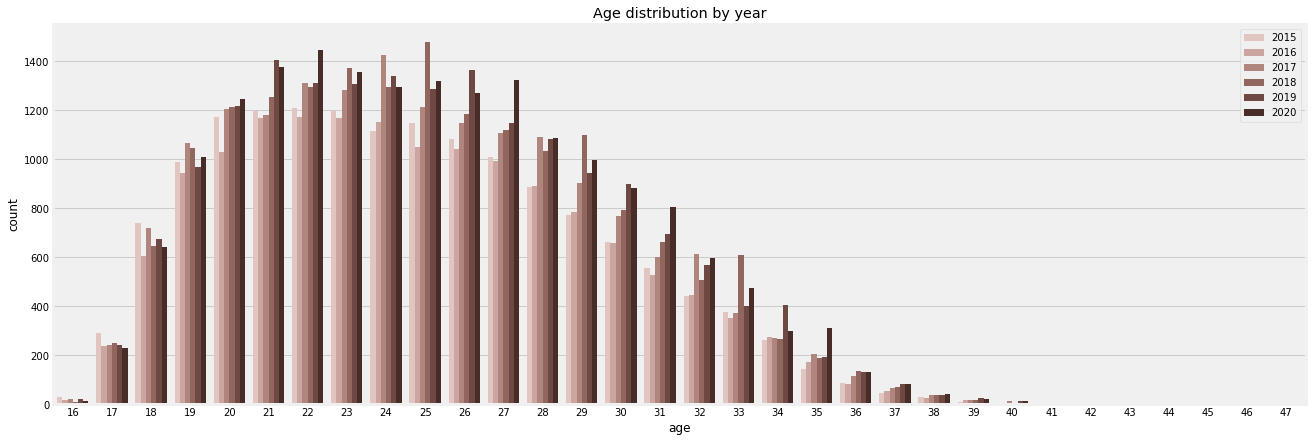

In [29]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'age', hue='year', palette = sb.cubehelix_palette(6, start=1, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Age distribution by year')
plt.legend(loc=1);

Although, the number of players aged 16 to 20 and 33 and over are similar in each year. We can see clearly that the number of players aged 21 to 23 has increased in the last 6 years with a bigger difference in number for players aged 25.

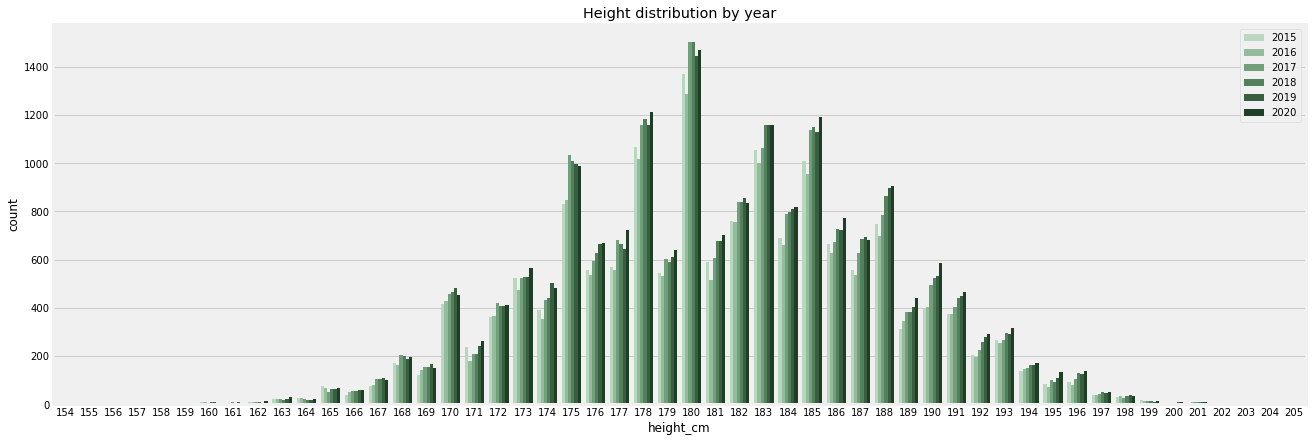

In [30]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'height_cm', hue='year', palette = sb.cubehelix_palette(6, start=2, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Height distribution by year')
plt.legend(loc=1);

The modal age of players throughout the last  6 years is 180 cm.

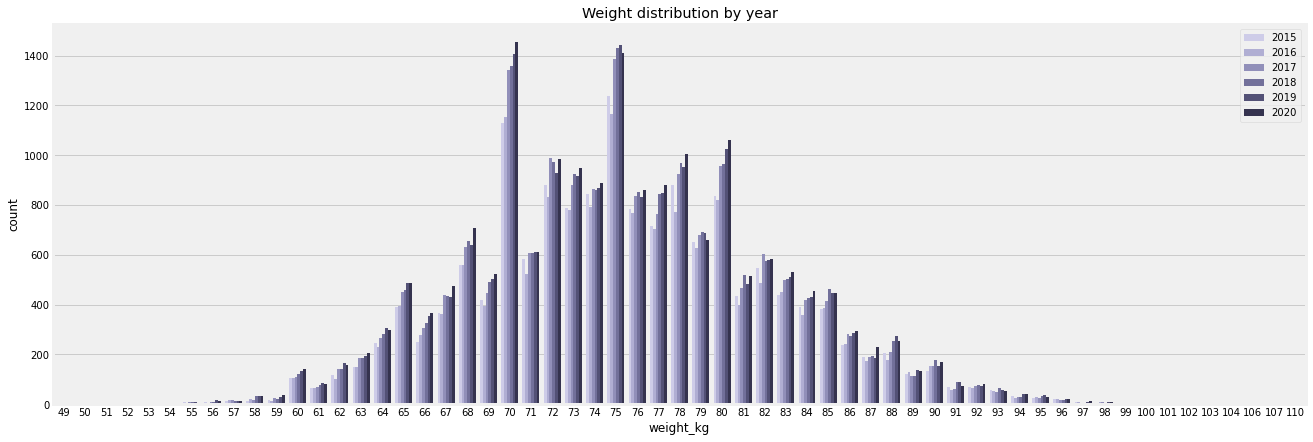

In [31]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'weight_kg', hue='year', palette = sb.cubehelix_palette(6, start=3, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Weight distribution by year')
plt.legend(loc=1);

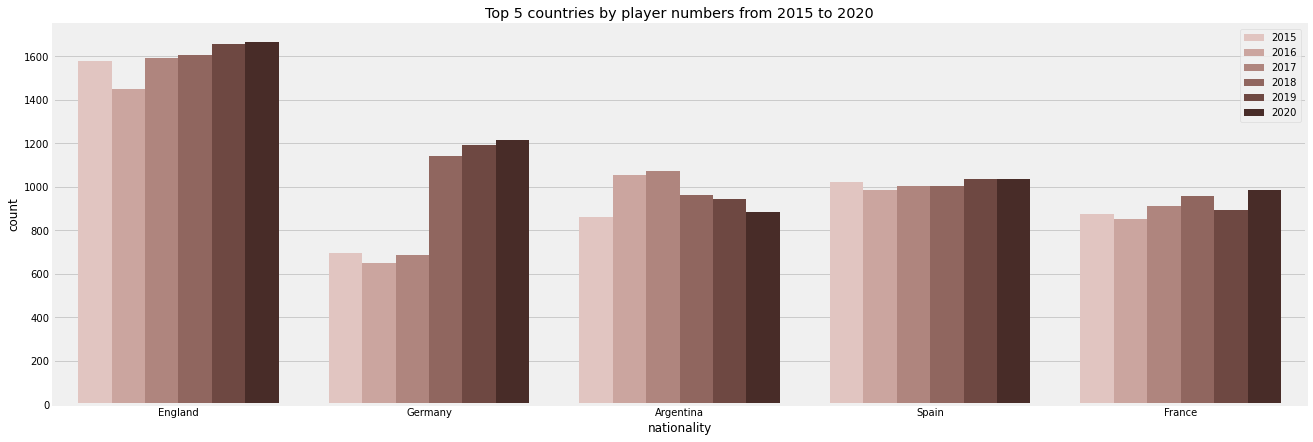

In [32]:
plt.figure(figsize = (20,7))
temp_df = df.groupby(['year','nationality']).count()['sofifa_id'].sort_values(ascending=False).iloc[:50].reset_index()
nl = ['England', 'Germany', 'Argentina', 'Spain', 'France']
top5 = temp_df.query('nationality in @nl')
sb.barplot(data = top5, x = 'nationality', y='sofifa_id' , hue='year', palette = sb.cubehelix_palette(6, start=4, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Top 5 countries by player numbers from 2015 to 2020')
plt.legend(loc=1)
plt.ylabel('count');

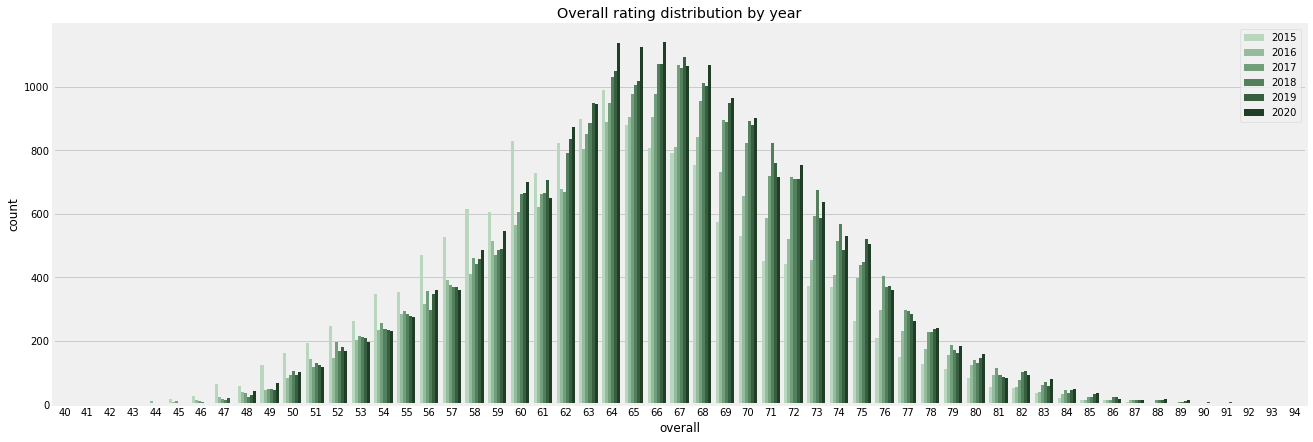

In [33]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'overall', hue='year', palette = sb.cubehelix_palette(6, start=5, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Overall rating distribution by year')
plt.legend(loc=1);

The number of player with ratings bigger than 60 has increased through the years, with the biggest increase of players rated 70 overall.

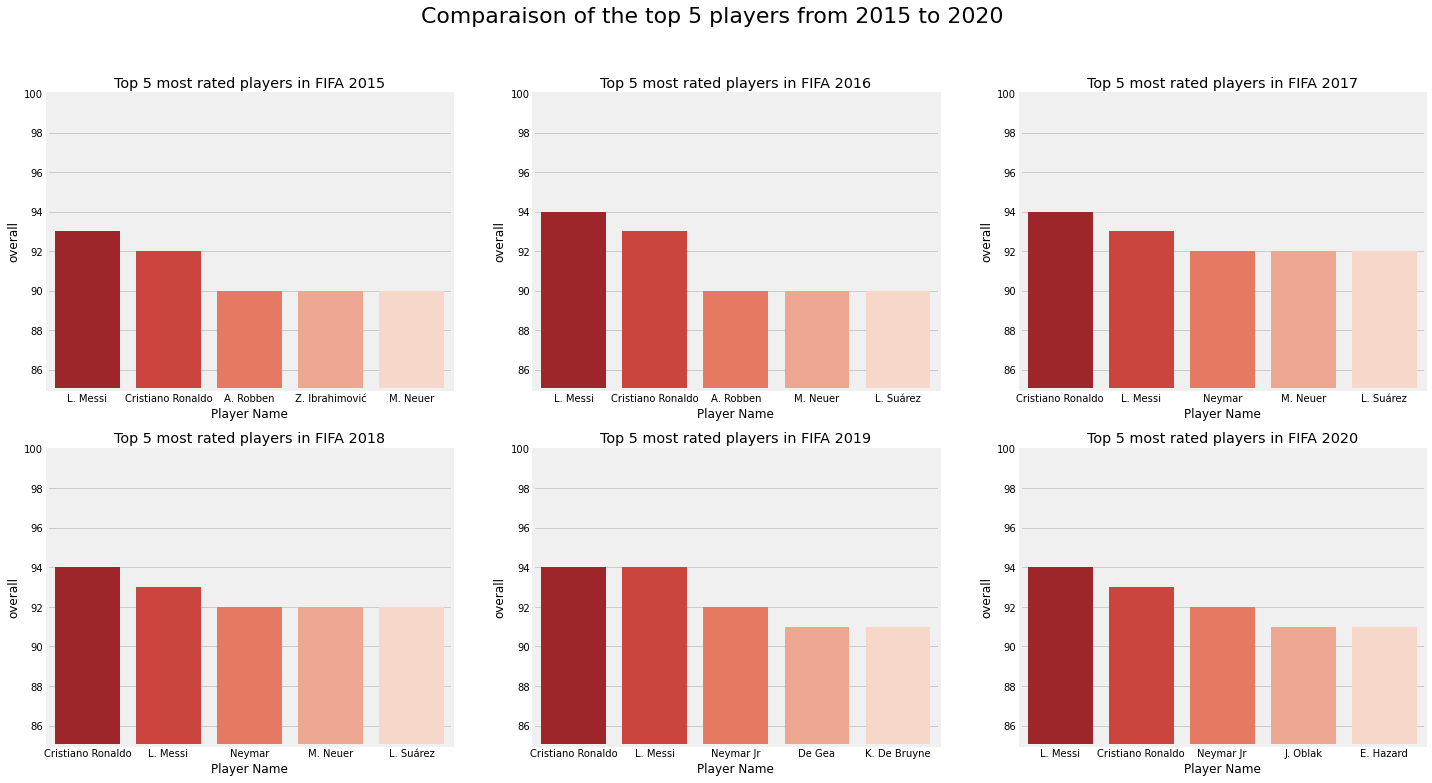

In [34]:
l=[]
for i in l_df:
    temp = i.head(5)[['short_name','overall','year']]
    l.append(temp)
fig = plt.figure(figsize=(22,12))
plt.suptitle('Comparaison of the top 5 players from 2015 to 2020',fontsize=22)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.subplot(231)
sb.barplot(data=l[0], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2015')
plt.subplot(232)
sb.barplot(data=l[1], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2016')
plt.subplot(233)
sb.barplot(data=l[2], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2017')
plt.subplot(234)
sb.barplot(data=l[3], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2018')
plt.subplot(235)
sb.barplot(data=l[4], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2019')
plt.subplot(236)
sb.barplot(data=l[5], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2020');

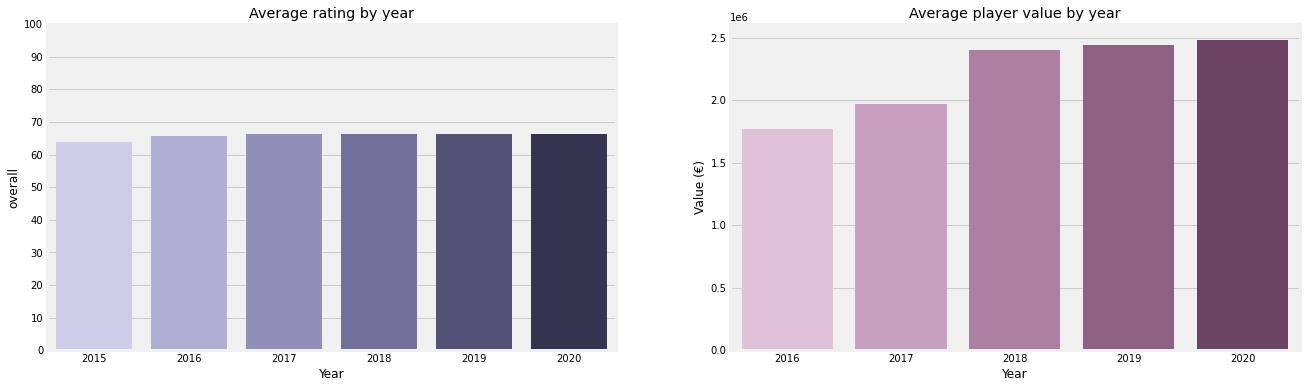

In [35]:
avg_ovr = df.groupby('year')['overall'].mean().reset_index()
avg_value = df.groupby('year')['value_eur'].mean().reset_index().drop(0,axis=0)

plt.figure(figsize=(20,6))
plt.subplot(121)
sb.barplot(data=avg_ovr, x='year', y='overall', palette= sb.cubehelix_palette(6, start=3, rot=0, dark=0.2, light=.8, reverse=False))
plt.ylim(0, 100)
plt.xlabel('Year')
plt.title('Average rating by year')
plt.yticks(np.arange(0, 100+1, 10))
plt.subplot(122)
sb.barplot(data=avg_value, x='year', y='value_eur', palette= sb.cubehelix_palette(6, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.xlabel('Year')
plt.ylabel('Value (€)')
plt.title('Average player value by year');

In [36]:
# Calculating the proportion of right foot players and left foot players in our dataset.

pref_foot = df.groupby(['year','preferred_foot'])['preferred_foot'].count().rename('count', inplace=True).reset_index()
pref_foot = pref_foot.pivot(index='year', columns='preferred_foot', values='count')
s = pref_foot['Left']+pref_foot['Right']
pref_foot['Left'] = pref_foot['Left']/s
pref_foot['Right'] = pref_foot['Right']/s

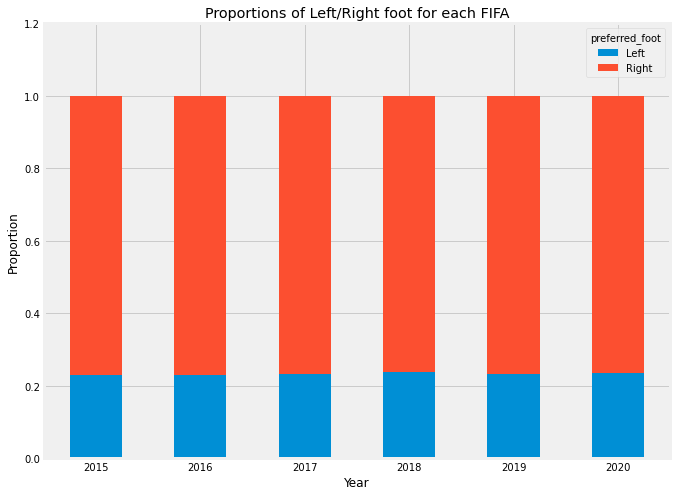

In [37]:
pref_foot.plot(kind='bar', stacked=True, figsize=(10,8), rot=0)
plt.title('Proportions of Left/Right foot for each FIFA')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.ylim(0,1.2);

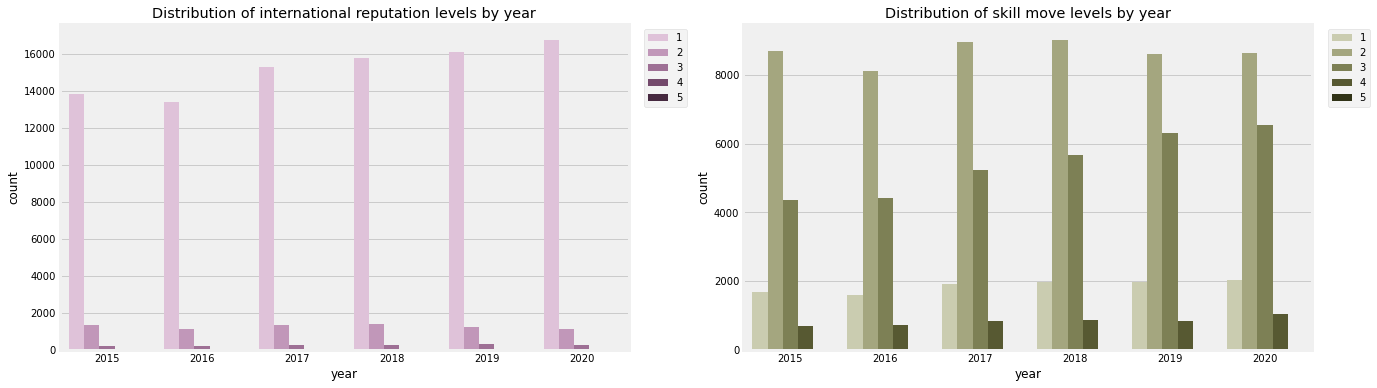

In [38]:
plt.figure(figsize=(20,6))
plt.tight_layout()
plt.subplot(121)
sb.countplot(data=df, x='year', hue='international_reputation', palette= sb.cubehelix_palette(5, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1))
plt.title('Distribution of international reputation levels by year')
plt.subplot(122)
sb.countplot(data=df, x='year', hue='skill_moves', palette= sb.cubehelix_palette(5, start=1.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1))
plt.title('Distribution of skill move levels by year');

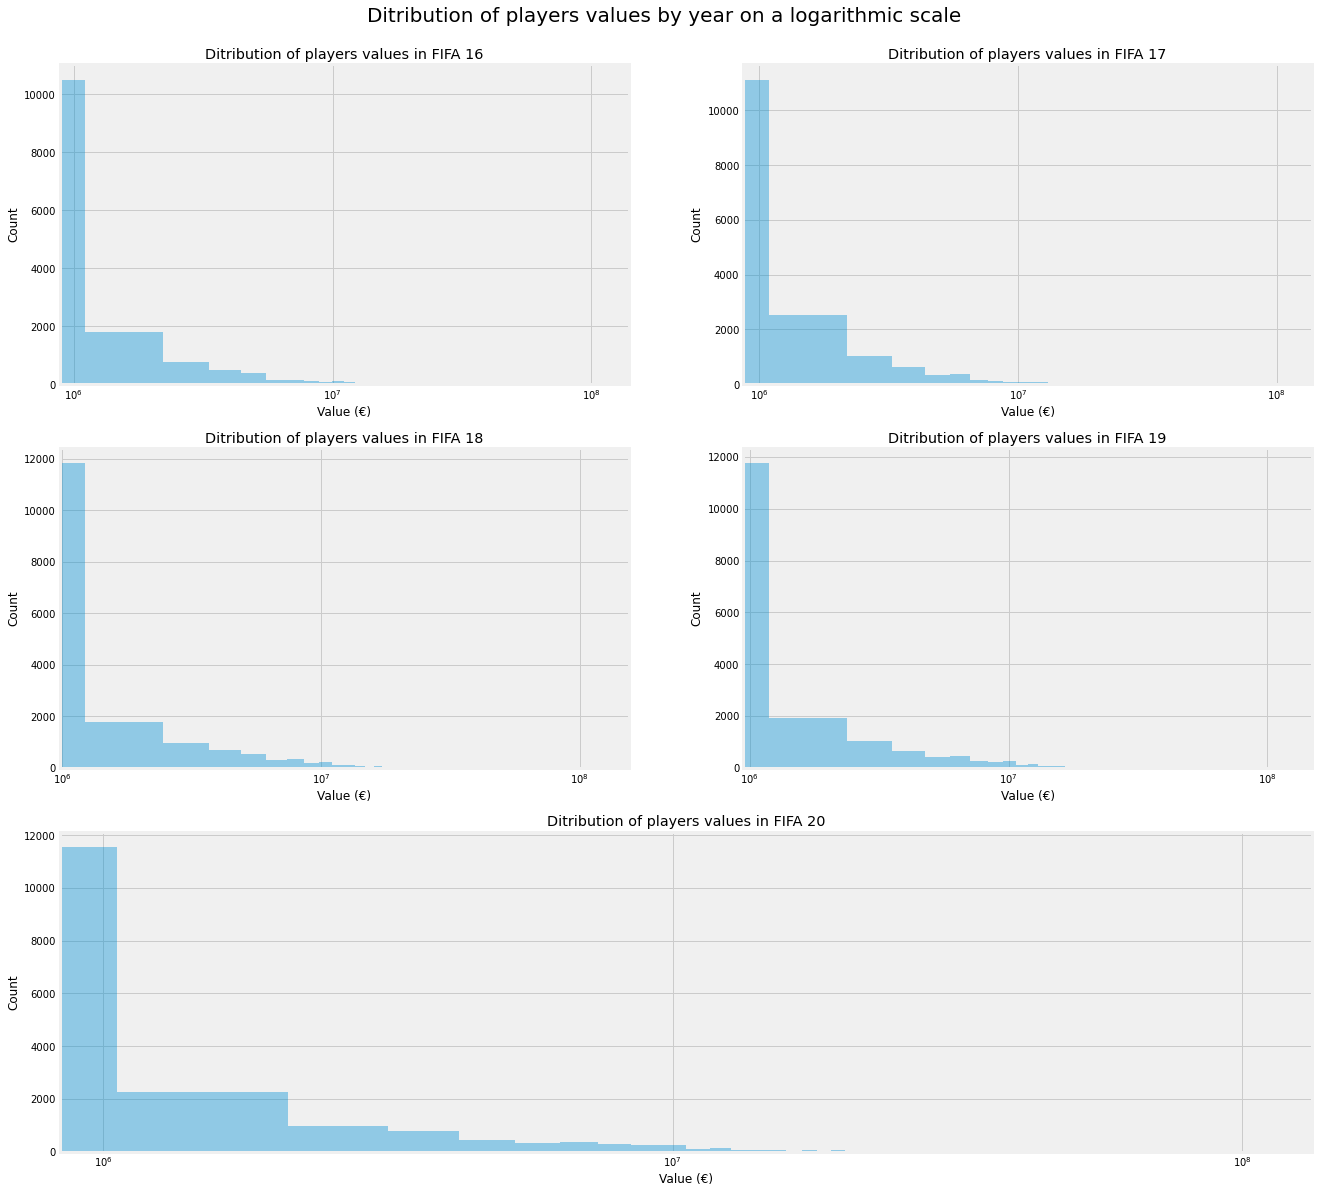

In [39]:
plt.figure(figsize=(20,20))
plt.suptitle('Ditribution of players values by year on a logarithmic scale', y=0.92, fontsize=20)
plt.subplot(321)
sb.distplot(df16.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 16')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(322)
sb.distplot(df17.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 17')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(323)
sb.distplot(df18.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 18')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(324)
sb.distplot(df19.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 19')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(313)
sb.distplot(df20.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 20')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count');

In [40]:
def get_players_noGK(df):
    idx_df_gk = list(df.query('pace==0').index)
    df_noGK = df.drop(idx_df_gk)
    return df_noGK

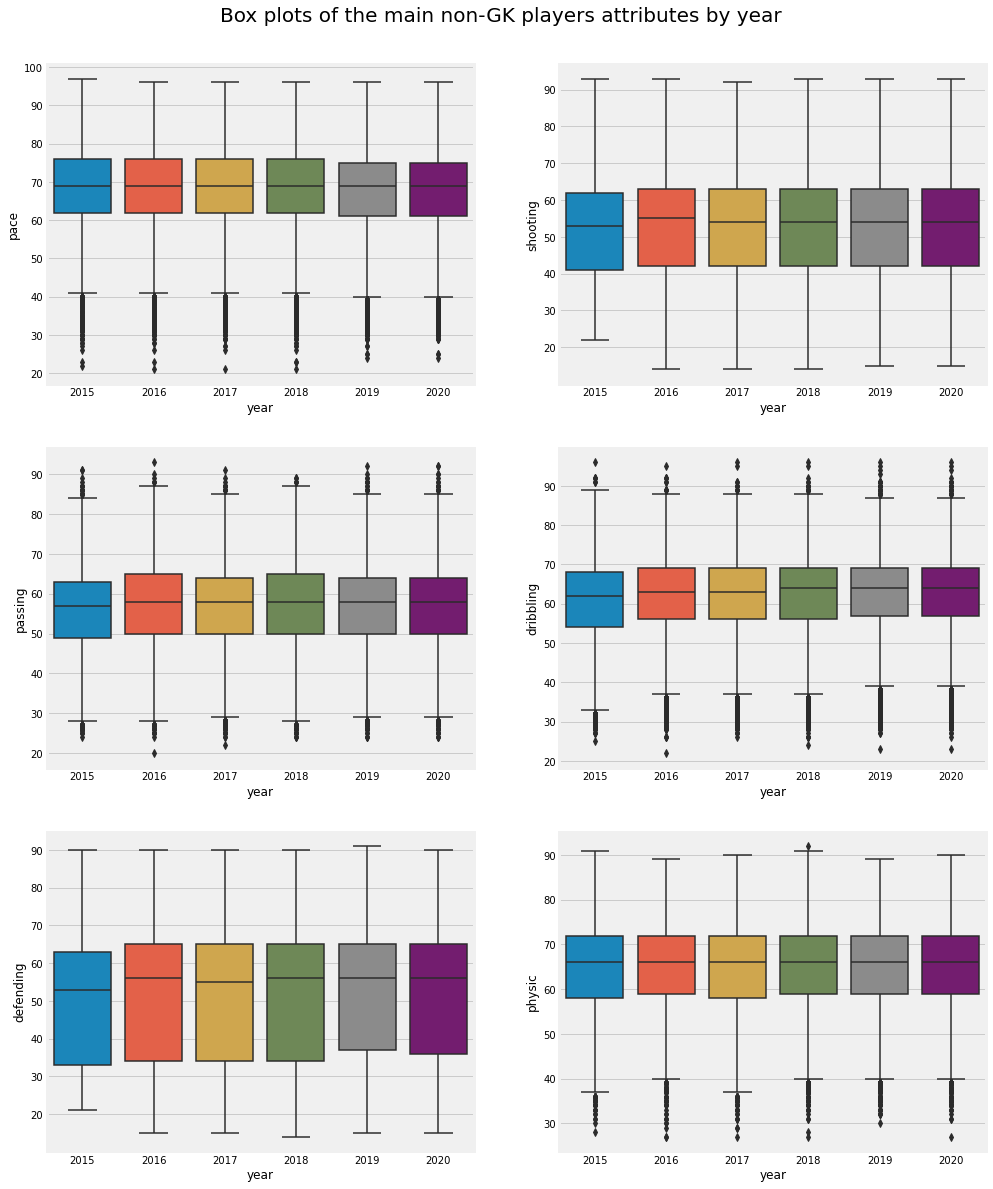

In [41]:
temp=get_players_noGK(df)
plt.figure(figsize=(15,20))
plt.suptitle('Box plots of the main non-GK players attributes by year', y=0.92, fontsize=20)
plt.subplot(321)
sb.boxplot(data=temp, x='year', y='pace',  linewidth=1.5)
plt.subplot(322)
sb.boxplot(data=temp, x='year', y='shooting',  linewidth=1.5)
plt.subplot(323)
sb.boxplot(data=temp, x='year', y='passing',  linewidth=1.5)
plt.subplot(324)
sb.boxplot(data=temp, x='year', y='dribbling',  linewidth=1.5)
plt.subplot(325)
sb.boxplot(data=temp, x='year', y='defending',  linewidth=1.5)
plt.subplot(326)
sb.boxplot(data=temp, x='year', y='physic',  linewidth=1.5);

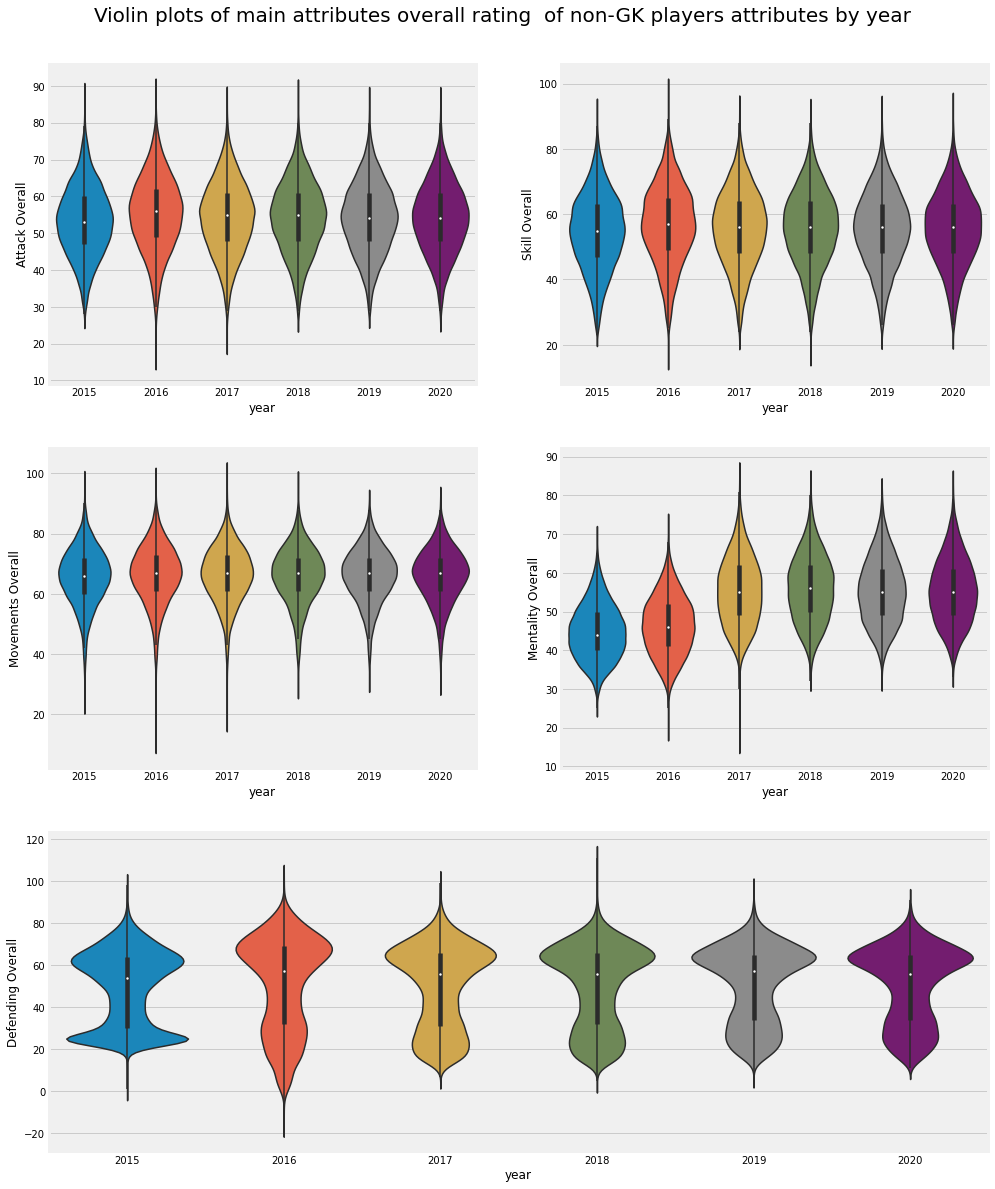

In [42]:
temp=get_players_noGK(df)
plt.figure(figsize=(15,20))
plt.suptitle('Violin plots of main attributes overall rating  of non-GK players attributes by year', y=0.92, fontsize=20)
plt.subplot(321)
sb.violinplot(data=temp, x='year', y='attack_oa',  linewidth=1.5)
plt.ylabel('Attack Overall')
plt.subplot(322)
sb.violinplot(data=temp, x='year', y='skill_oa',  linewidth=1.5)
plt.ylabel('Skill Overall')
plt.subplot(323)
sb.violinplot(data=temp, x='year', y='movements_oa',  linewidth=1.5)
plt.ylabel('Movements Overall')
plt.subplot(324)
sb.violinplot(data=temp, x='year', y='mentality_oa',  linewidth=1.5)
plt.ylabel('Mentality Overall')
plt.subplot(313)
sb.violinplot(data=temp, x='year', y='defending_oa',  linewidth=1.5)
plt.ylabel('Defending Overall');

In [43]:
def get_best_by_pos(df):
    l=[]
    temp = df.groupby(['team_position'])[['overall']].max()
    for i in list(temp.index):
        ovr = temp.loc[i][0]
        best_i = df.query('team_position==@i & overall==@ovr').iloc[0]
        l.append(best_i)
    best_pos = pd.DataFrame(l)
    return best_pos

In [44]:
l=[]
l.append(get_best_by_pos(df15))
l.append(get_best_by_pos(df16))
l.append(get_best_by_pos(df17))
l.append(get_best_by_pos(df18))
l.append(get_best_by_pos(df19))
l.append(get_best_by_pos(df20))
best_pos = pd.concat(l, ignore_index=True)

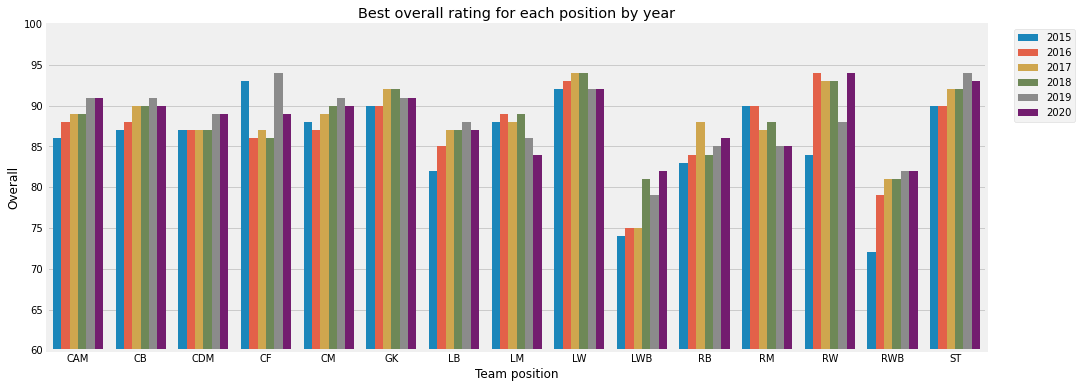

In [45]:
plt.figure(figsize=(15,6))
plt.title('Best overall rating for each position by year')
sb.barplot(data=best_pos, x='team_position', y='overall', hue='year')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('Team position')
plt.ylabel('Overall')
plt.ylim(60,100);

**Best Players in every position in each year:**

In [46]:
gb = best_pos.groupby('team_position')    
l = [gb.get_group(x) for x in gb.groups]

display(l[0].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[1].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(60) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
0,J. Rodríguez,CAM,86,Real Madrid,Colombia,2015
15,David Silva,CAM,88,Manchester City,Spain,2016
30,M. Özil,CAM,89,Arsenal,Germany,2017
45,K. De Bruyne,CAM,89,Manchester City,Belgium,2018
60,K. De Bruyne,CAM,91,Manchester City,Belgium,2019
75,K. De Bruyne,CAM,91,Manchester City,Belgium,2020


,short_name,team_position,overall,club,nationality,year
1,Sergio Ramos,CB,87,Real Madrid,Spain,2015
16,Thiago Silva,CB,88,Paris Saint-Germain,Brazil,2016
31,J. Boateng,CB,90,FC Bayern München,Germany,2017
46,Sergio Ramos,CB,90,Real Madrid,Spain,2018
61,Sergio Ramos,CB,91,Real Madrid,Spain,2019
76,V. van Dijk,CB,90,Liverpool,Netherlands,2020


In [47]:
display(l[2].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[3].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(61) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
2,P. Lahm,CDM,87,FC Bayern München,Germany,2015
17,P. Lahm,CDM,87,FC Bayern München,Germany,2016
32,Sergio Busquets,CDM,87,FC Barcelona,Spain,2017
47,N. Kanté,CDM,87,Chelsea,France,2018
62,N. Kanté,CDM,89,Chelsea,France,2019
77,N. Kanté,CDM,89,Chelsea,France,2020


,short_name,team_position,overall,club,nationality,year
3,L. Messi,CF,93,FC Barcelona,Argentina,2015
18,T. Müller,CF,86,FC Bayern München,Germany,2016
33,T. Müller,CF,87,FC Bayern München,Germany,2017
48,D. Mertens,CF,86,Napoli,Belgium,2018
63,L. Messi,CF,94,FC Barcelona,Argentina,2019
78,A. Griezmann,CF,89,FC Barcelona,France,2020


In [48]:
display(l[4].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[5].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(62) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
4,B. Schweinsteiger,CM,88,FC Bayern München,Germany,2015
19,T. Kroos,CM,87,Real Madrid,Germany,2016
34,L. Modrić,CM,89,Real Madrid,Croatia,2017
49,T. Kroos,CM,90,Real Madrid,Germany,2018
64,L. Modrić,CM,91,Real Madrid,Croatia,2019
79,L. Modrić,CM,90,Real Madrid,Croatia,2020


,short_name,team_position,overall,club,nationality,year
5,M. Neuer,GK,90,FC Bayern München,Germany,2015
20,M. Neuer,GK,90,FC Bayern München,Germany,2016
35,M. Neuer,GK,92,FC Bayern München,Germany,2017
50,M. Neuer,GK,92,FC Bayern München,Germany,2018
65,De Gea,GK,91,Manchester United,Spain,2019
80,J. Oblak,GK,91,Atlético Madrid,Slovenia,2020


In [49]:
display(l[6].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[7].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(63) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
6,D. Alaba,LB,82,FC Bayern München,Austria,2015
21,D. Alaba,LB,85,FC Bayern München,Austria,2016
36,D. Alaba,LB,87,FC Bayern München,Austria,2017
51,Marcelo,LB,87,Real Madrid,Brazil,2018
66,Marcelo,LB,88,Real Madrid,Brazil,2019
81,Jordi Alba,LB,87,FC Barcelona,Spain,2020


,short_name,team_position,overall,club,nationality,year
7,E. Hazard,LM,88,Chelsea,Belgium,2015
22,E. Hazard,LM,89,Chelsea,Belgium,2016
37,E. Hazard,LM,88,Chelsea,Belgium,2017
52,A. Sánchez,LM,89,Arsenal,Chile,2018
67,I. Perišić,LM,86,Inter,Croatia,2019
82,K. Coman,LM,84,FC Bayern München,France,2020


In [50]:
display(l[8].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[9].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(64) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
8,Cristiano Ronaldo,LW,92,Real Madrid,Portugal,2015
23,Cristiano Ronaldo,LW,93,Real Madrid,Portugal,2016
38,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2017
53,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2018
68,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2019
83,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2020


,short_name,team_position,overall,club,nationality,year
9,M. Layún,LWB,74,Club América,Mexico,2015
24,C. Molinaro,LWB,75,Torino,Italy,2016
39,C. Molinaro,LWB,75,Torino,Italy,2017
54,Marcos Alonso,LWB,81,Chelsea,Spain,2018
69,Jonny,LWB,79,Wolverhampton Wanderers,Spain,2019
84,N. Schulz,LWB,82,Borussia Dortmund,Germany,2020


In [51]:
display(l[10].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[11].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(65) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
10,Dani Alves,RB,83,FC Barcelona,Brazil,2015
25,Dani Alves,RB,84,FC Barcelona,Brazil,2016
40,P. Lahm,RB,88,FC Bayern München,Germany,2017
55,Carvajal,RB,84,Real Madrid,Spain,2018
70,J. Kimmich,RB,85,FC Bayern München,Germany,2019
85,J. Kimmich,RB,86,FC Bayern München,Germany,2020


,short_name,team_position,overall,club,nationality,year
11,A. Robben,RM,90,FC Bayern München,Netherlands,2015
26,A. Robben,RM,90,FC Bayern München,Netherlands,2016
41,A. Robben,RM,87,FC Bayern München,Netherlands,2017
56,A. Robben,RM,88,FC Bayern München,Netherlands,2018
71,A. Robben,RM,85,FC Bayern München,Netherlands,2019
86,Koke,RM,85,Atlético Madrid,Spain,2020


In [52]:
display(l[12].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[13].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(66) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
12,A. Sánchez,RW,84,Arsenal,Chile,2015
27,L. Messi,RW,94,FC Barcelona,Argentina,2016
42,L. Messi,RW,93,FC Barcelona,Argentina,2017
57,L. Messi,RW,93,FC Barcelona,Argentina,2018
72,M. Salah,RW,88,Liverpool,Egypt,2019
87,L. Messi,RW,94,FC Barcelona,Argentina,2020


,short_name,team_position,overall,club,nationality,year
13,A. Elmohamady,RWB,72,Hull City,Egypt,2015
28,Bruno Peres,RWB,79,Torino,Brazil,2016
43,Bruno Peres,RWB,81,Roma,Brazil,2017
58,Mário Fernandes,RWB,81,PFC CSKA Moscow,Russia,2018
73,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2019
88,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2020


In [53]:
display(l[14].loc[:,['short_name','team_position','overall','club','nationality','year']])

,short_name,team_position,overall,club,nationality,year
14,Z. Ibrahimović,ST,90,Paris Saint-Germain,Sweden,2015
29,L. Suárez,ST,90,FC Barcelona,Uruguay,2016
44,L. Suárez,ST,92,FC Barcelona,Uruguay,2017
59,L. Suárez,ST,92,FC Barcelona,Uruguay,2018
74,Cristiano Ronaldo,ST,94,Juventus,Portugal,2019
89,Cristiano Ronaldo,ST,93,Juventus,Portugal,2020


In [54]:
interesting_cols = ['height_cm','weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot','skill_moves', 'work_rate', 'body_type','pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef']
select_df = df[interesting_cols]

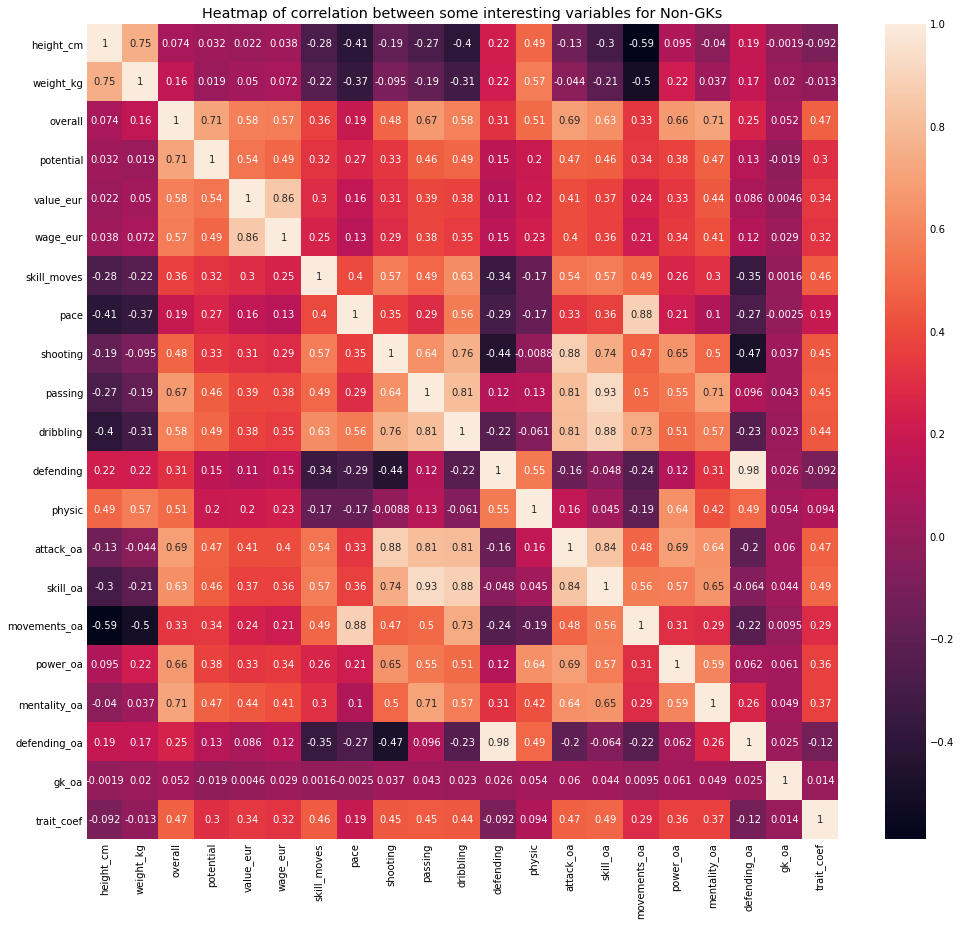

In [55]:
plt.figure(figsize=(15,15))
sb.heatmap(select_df.drop(list(df.query('pace==0').index)).corr(), annot=True)
plt.title('Heatmap of correlation between some interesting variables for Non-GKs');

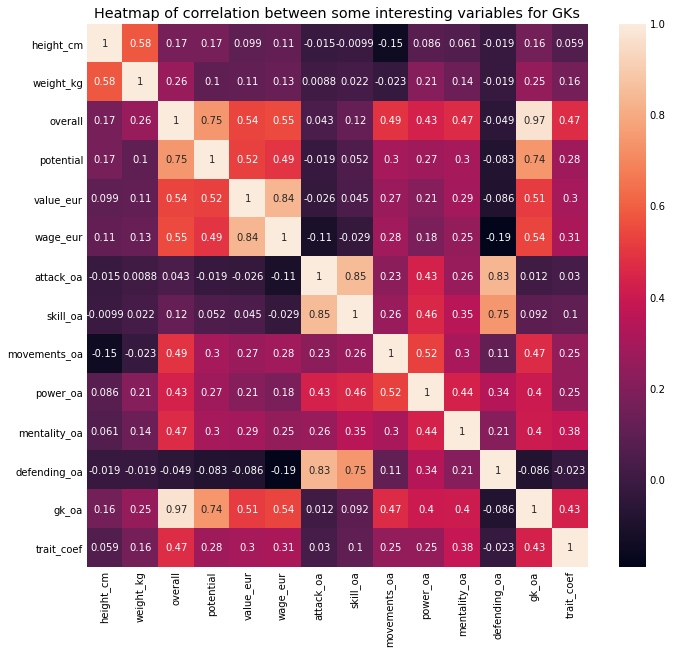

In [56]:
plt.figure(figsize=(10,10))
select_df_gk = select_df.drop(['skill_moves', 'work_rate', 'body_type','pace', 'shooting', 'passing', 'dribbling','defending', 'physic'], axis=1)
sb.heatmap(select_df_gk.drop(list(df.query('pace!=0').index)).corr(), annot=True)
plt.title('Heatmap of correlation between some interesting variables for GKs');

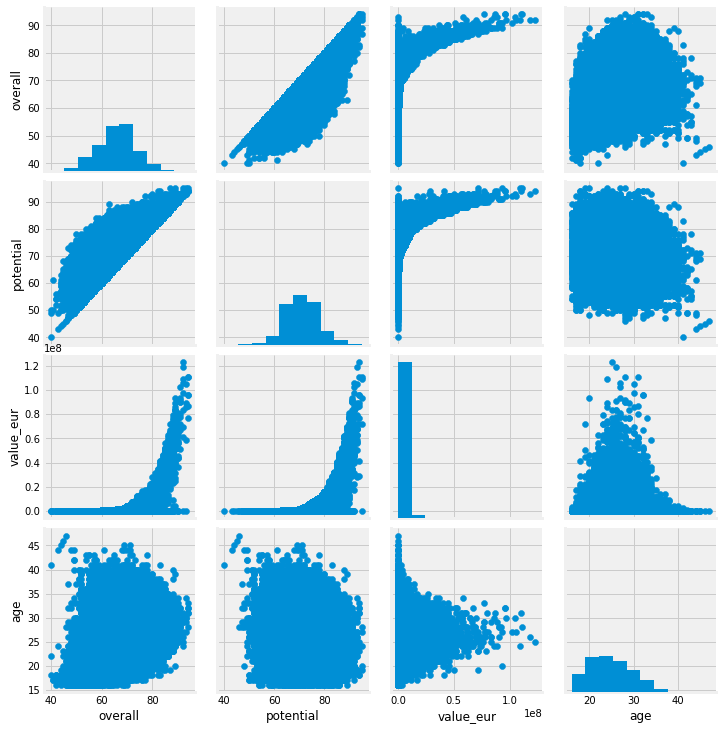

In [57]:
grid = sb.PairGrid(df[['overall', 'potential', 'value_eur','age']])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter);

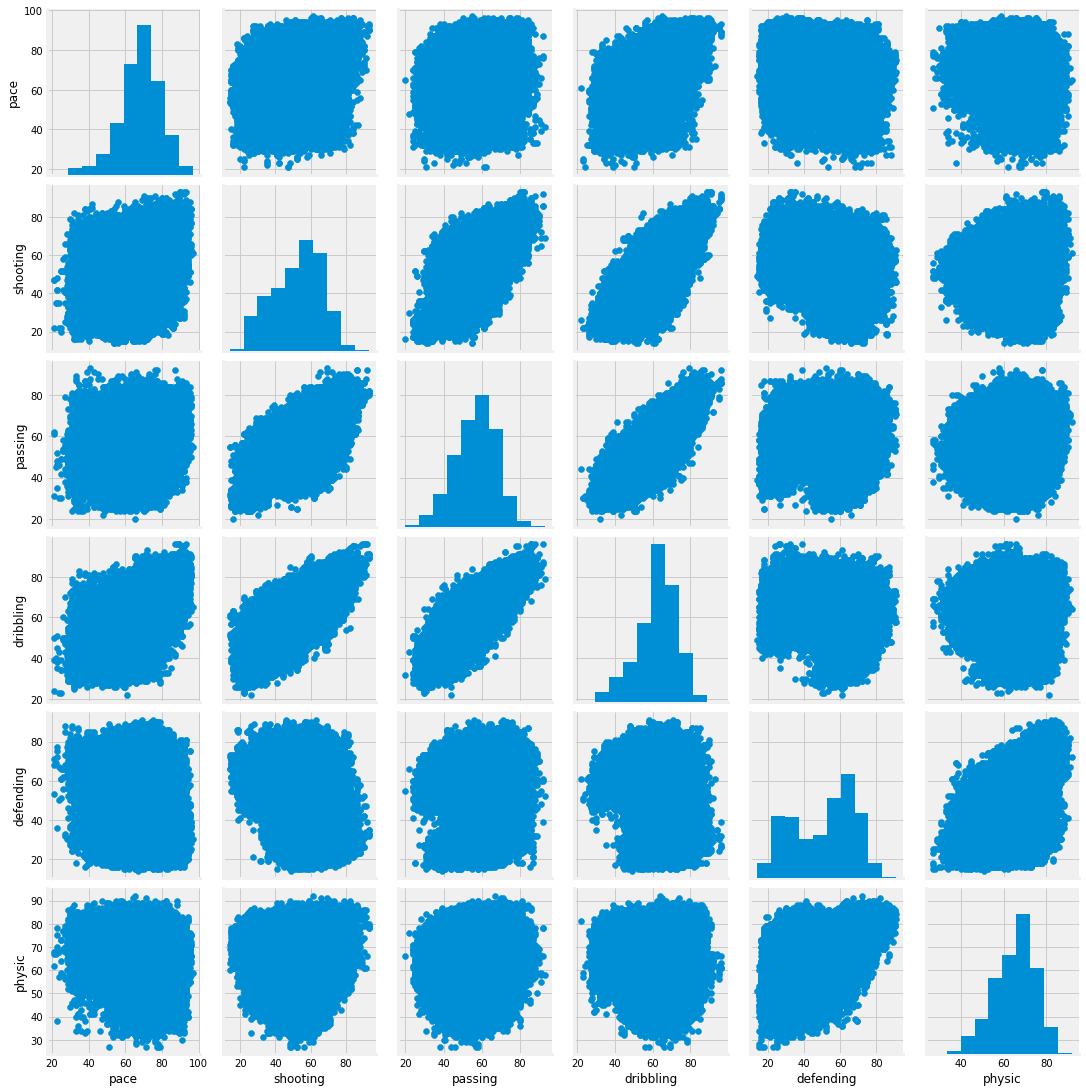

In [58]:
df_temp = df.drop(list(df.query('pace==0').index))
grid = sb.PairGrid(df_temp[['pace', 'shooting', 'passing', 'dribbling','defending', 'physic']])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter);

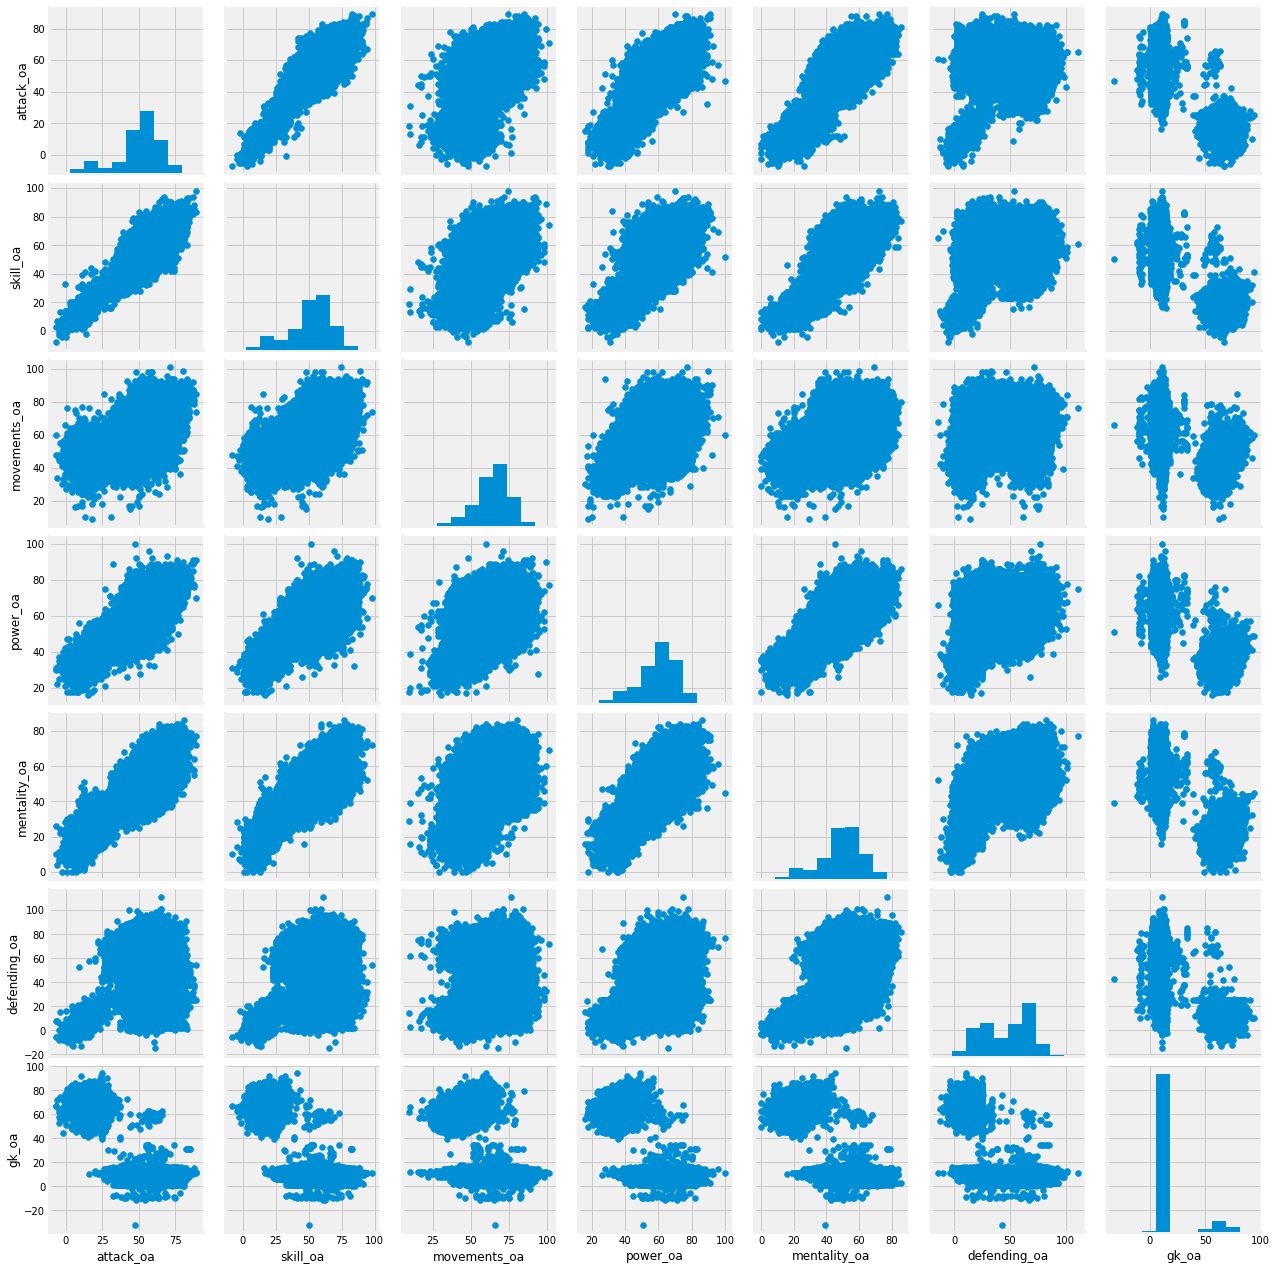

In [59]:
grid = sb.PairGrid(df[['attack_oa', 'skill_oa', 'movements_oa','power_oa', 'mentality_oa', 'defending_oa', 'gk_oa']])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter);

In [60]:
# Some countries are passed as clubs so we need to clean that up to get the top clubs by ratings.

country_list = ['Argentina','Australia','Austria','Belgium','Bolivia','Brazil','Bulgaria','Cameroon','Canada','Chile','China','Colombia','Côte d’Ivoire'
,'Czech Republic','Denmark','Ecuador','Egypt','England','Finland','France','Germany','Greece','Hungary','Iceland','India'
,'Ireland','Italy','Mexico','Netherlands','New Zealand','Northern Ireland','Norway','Paraguay','Peru','Poland'
,'Portugal','Romania','Russia','Scotland','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United States','Uruguay','Venezuela','Wales']

def top_club_avg_ovr(df):
    temp = df.groupby(['club']).mean()[['overall','year']].sort_values(by='overall',ascending=False).reset_index()
    temp.drop(list(temp.query('club in @country_list').index),inplace=True)
    res = temp.head(3)
    return res

In [61]:
l=[]
for i in l_df:
    l.append(top_club_avg_ovr(i))
top_club = pd.concat(l)

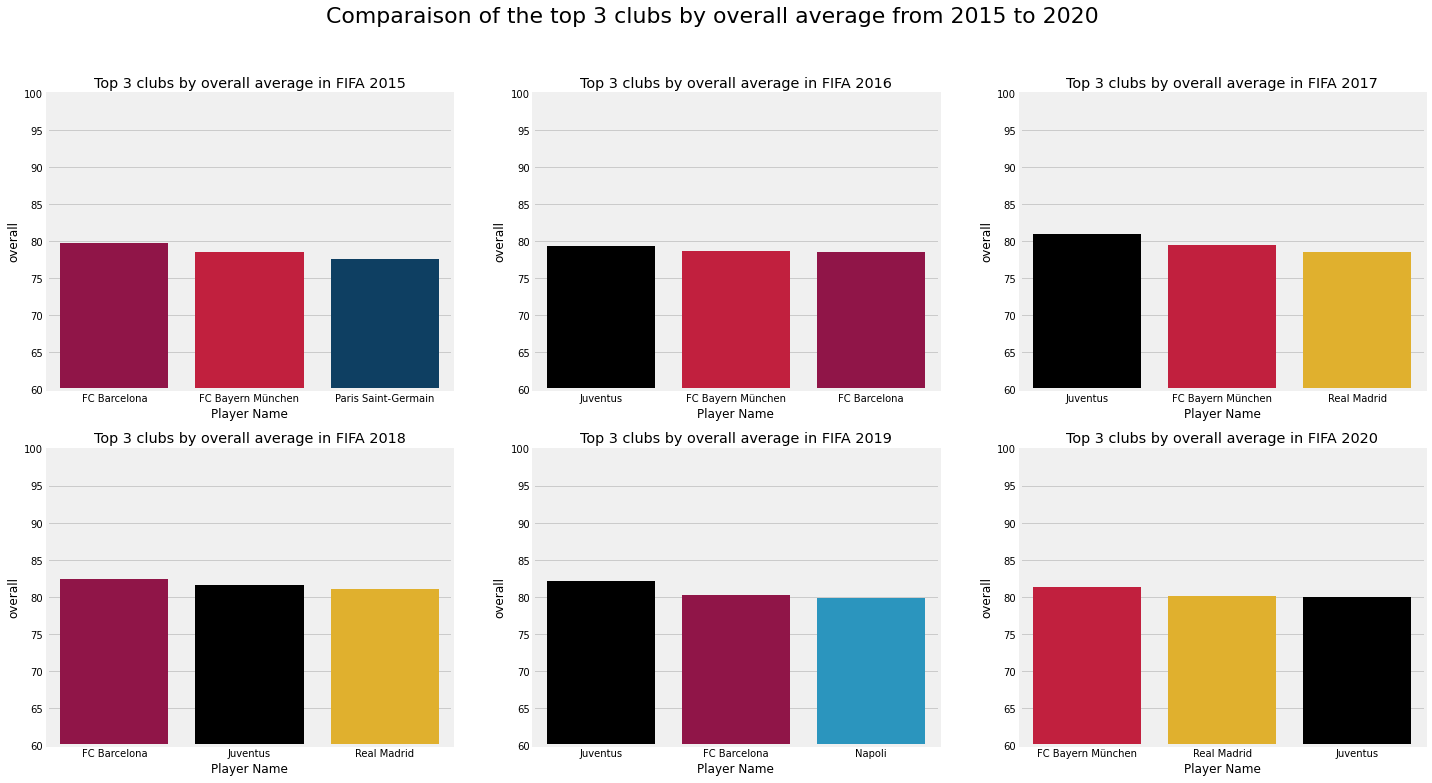

In [62]:
years = [2015,2016,2017,2018,2019,2020]
barca = '#A50044'
bayern = '#DC052D'
paris = '#004170'
juve = '#000000'
real = "#FEBE10"
napoli = '#12A0D7'
chelsea = '#034694'
city = '#6CABDD'
liver = '#00B2A9'
united = '#DA291C'
roma = '#8E1F2F'
dortmund = '#FDE100'
leipzig= '#0C2043'


l=[]
for i in years:
    temp = top_club.query('year==@i')
    l.append(temp)
fig = plt.figure(figsize=(22,12))
plt.suptitle('Comparaison of the top 3 clubs by overall average from 2015 to 2020',fontsize=22)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.subplot(231)
sb.barplot(data=l[0], x='club', y='overall', palette=[barca,bayern,paris])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2015')
plt.subplot(232)
sb.barplot(data=l[1], x='club', y='overall', palette=[juve, bayern, barca])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2016')
plt.subplot(233)
sb.barplot(data=l[2], x='club', y='overall', palette=[juve,bayern,real])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2017')
plt.subplot(234)
sb.barplot(data=l[3], x='club', y='overall', palette=[barca,juve,real])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2018')
plt.subplot(235)
sb.barplot(data=l[4], x='club', y='overall', palette=[juve,barca,napoli])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2019')
plt.subplot(236)
sb.barplot(data=l[5], x='club', y='overall', palette=[bayern,real,juve])
plt.ylim(60, 100)
plt.xlabel('Player Name')
plt.title('Top 3 clubs by overall average in FIFA 2020');

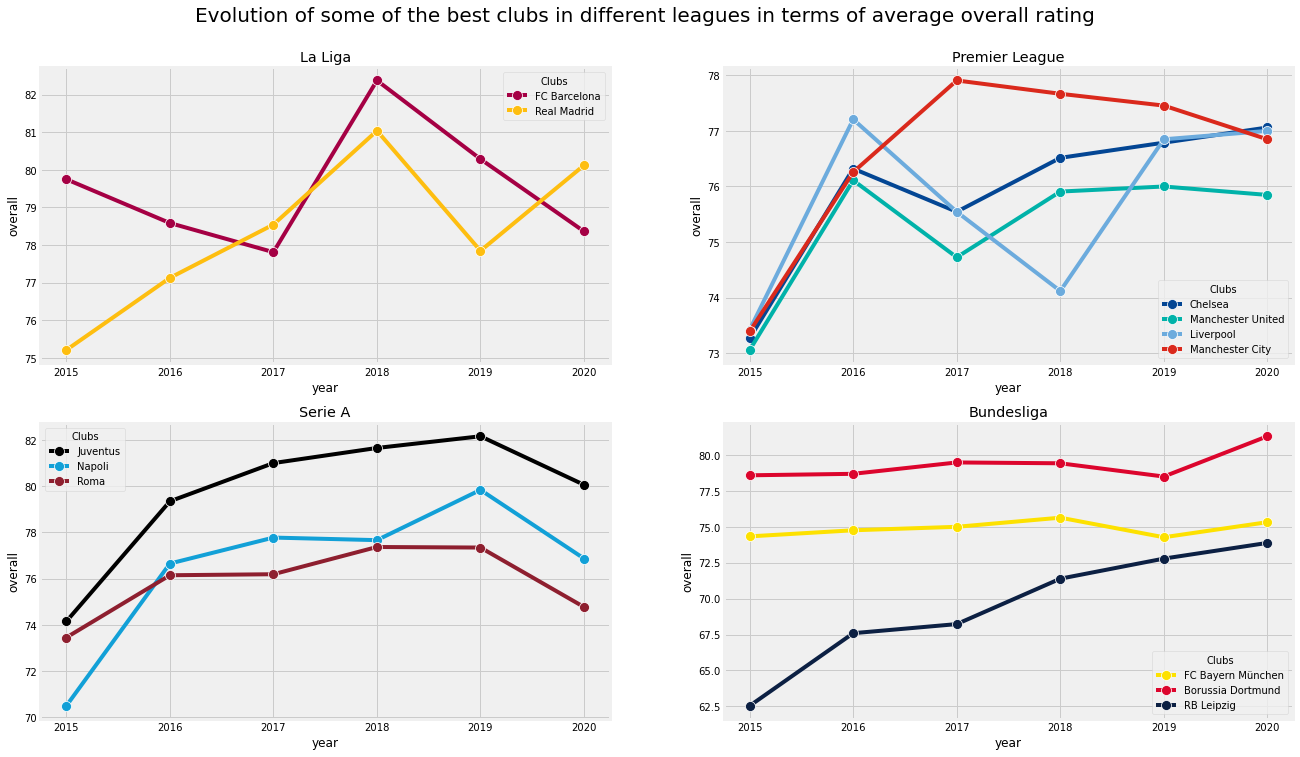

In [63]:
LL=["FC Barcelona","Real Madrid"]
PL=["Chelsea","Manchester United", "Liverpool", "Manchester City"]
SA=["Juventus","Napoli","Roma"]
BL=["FC Bayern München","Borussia Dortmund","RB Leipzig"]

LLdf = df.query('club in @LL').groupby(['year','club']).mean()['overall'].reset_index()
PLdf = df.query('club in @PL').groupby(['year','club']).mean()['overall'].reset_index()
SAdf = df.query('club in @SA').groupby(['year','club']).mean()['overall'].reset_index()
BLdf = df.query('club in @BL').groupby(['year','club']).mean()['overall'].reset_index()

plt.figure(figsize=(20,12))
plt.suptitle('Evolution of some of the best clubs in different leagues in terms of average overall rating', y=0.95,fontsize='20')
plt.subplot(221)
sb.lineplot(data=LLdf, x='year', y='overall', hue='club', palette=[barca,real], marker='o', markersize=10 , legend=False)
plt.legend(LL, title='Clubs')
plt.title('La Liga')
plt.subplot(222)
sb.lineplot(data=PLdf, x='year', y='overall', hue='club', palette=[chelsea, liver, city, united], marker='o', markersize=10, legend=False)
plt.legend(PL, title='Clubs')
plt.title('Premier League')
plt.subplot(223)
sb.lineplot(data=SAdf, x='year', y='overall', hue='club', palette=[juve, napoli, roma], marker='o', markersize=10, legend=False)
plt.legend(SA, title='Clubs')
plt.title('Serie A')
plt.subplot(224)
sb.lineplot(data=BLdf, x='year', y='overall', hue='club', palette=[dortmund, bayern, leipzig], marker='o', markersize=10, legend=False)
plt.title('Bundesliga')
plt.legend(BL, title='Clubs');

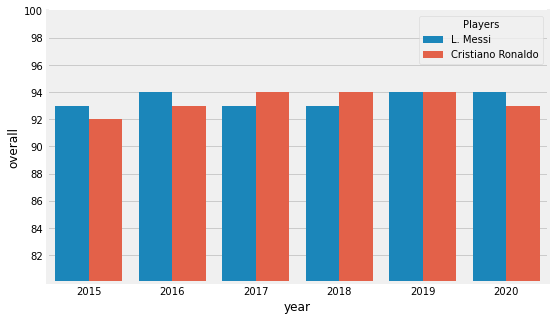

In [64]:
crm_df = df.query('short_name == "L. Messi" | short_name == "Cristiano Ronaldo"')
plt.figure(figsize=(8,5))
ax = sb.barplot(data=crm_df[['short_name','overall', 'year']], x='year', y='overall', hue='short_name')
ax.set_yticks(np.arange(82,100+1,2))
plt.ylim(80,100)
ax.legend(title='Players');

In [65]:
attrib_categ=['attack_oa', 'skill_oa', 'movements_oa', 'power_oa', 'mentality_oa', 'defending_oa']
categ=['ATT', 'SKI', 'MVT', 'PWR', 'MEN', 'DEF']

def plot_radar(df, p1, p2, att_cat, cat, ax):
    N = len(att_cat)
    range_list = list(np.arange(0,100,20))
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax.set_theta_offset(7* pi / 6)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],cat)

    ax.set_rlabel_position(0)
    plt.yticks(range_list , map(str, range_list), color="grey", size=10)
    plt.ylim(0,100)

    values_p1 = df.query('short_name == @p1')[attrib_categ].values.flatten().tolist()
    values_p1 += values_p1[:1]
    values_p2 = df.query('short_name == @p2')[attrib_categ].values.flatten().tolist()
    values_p2 += values_p2[:1]

    ax.plot(angles, values_p1, linewidth=1, linestyle='solid', label="group A")
    ax.fill(angles, values_p1, 'b', alpha=0.1)

    ax.plot(angles, values_p2, linewidth=1, linestyle='solid', label="group A")
    ax.fill(angles, values_p2, 'b', alpha=0.1)


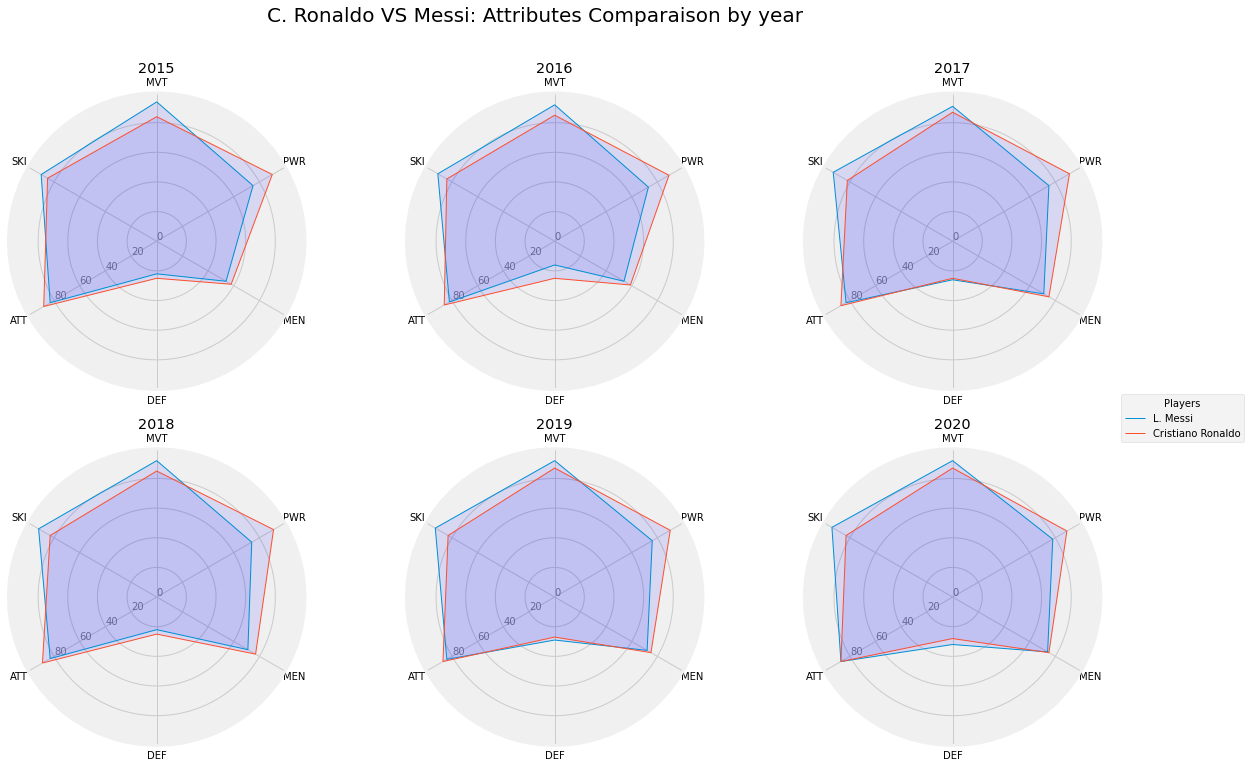

In [66]:
plt.figure(figsize=(18,12))
plt.suptitle('C. Ronaldo VS Messi: Attributes Comparaison by year', fontsize='20')
subplot_l = [231,232,233,234,235,236]
for i,j,k in zip(l_df,subplot_l,years):
    ax = plt.subplot(j, polar=True)
    plot_radar(i,'L. Messi', 'Cristiano Ronaldo', attrib_categ, categ, ax)
    plt.title(k)
plt.legend(['L. Messi', 'Cristiano Ronaldo'], title='Players' , bbox_to_anchor=(1.5, 1.2));

## Prediction models

In this section of the notebook we're going to create basic models using scikit-learn library to predict:
 - The overall rating of a players using Ordinary Least Square regression model.
 - The position of a player using Decision Tree, K-Nearest-Neighbors, and Support Vector Machine models.
 
In the training phase of each model we're going to use only the data from 2015 to 2019. Once the model is trained we're going to test it using he 2020 data and compare its results with those of the other models.

### Overall rating prediction

In [67]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'team_position',
       'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef',
       'year'],
      dtype='object')

In [68]:
# Construction of the features dataframe for the regression model

l=[2015,2016,2017,2018,2019]
features = ['age', 'value_eur','wage_eur','international_reputation','skill_moves', 'pace', 'shooting', 'passing', 'dribbling',
            'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa', 'power_oa', 'mentality_oa', 
            'defending_oa', 'gk_oa', 'trait_coef','year']

ols_data = df.query('year in @l')[features].copy()
y = df.query('year in @l')['overall'].copy()

ols_data.loc[ols_data.value_eur==0,'value_eur'] = ols_data['value_eur'].mean()
ols_data.loc[ols_data.wage_eur==0,'wage_eur'] = ols_data['wage_eur'].mean()
ols_data['isGK'] = (ols_data['pace']==0).astype(int)
cols = list(ols_data.columns)
ols_data

,age,value_eur,wage_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,...,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef,year,isGK
0,27,1.758932e+06,9041.502956,5,4,93.0,89.0,86.0,96.0,27.0,...,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16,2015,0
1,29,1.758932e+06,9041.502956,5,5,93.0,93.0,81.0,91.0,32.0,...,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18,2015,0
2,30,1.758932e+06,9041.502956,5,4,93.0,86.0,83.0,92.0,32.0,...,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20,2015,0
3,32,1.758932e+06,9041.502956,5,4,76.0,91.0,81.0,86.0,34.0,...,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20,2015,0
4,28,1.758932e+06,9041.502956,5,1,0.0,0.0,0.0,0.0,0.0,...,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82712,19,6.000000e+04,1000.000000,1,2,52.0,32.0,46.0,45.0,46.0,...,38.0,39.0,55.0,45.0,43.0,46.0,10.0,0,2019,0
82713,18,6.000000e+04,1000.000000,1,2,64.0,43.0,40.0,52.0,23.0,...,41.0,42.0,61.0,54.0,37.0,22.0,11.0,0,2019,0
82714,20,6.000000e+04,1000.000000,1,2,81.0,35.0,47.0,49.0,44.0,...,41.0,42.0,71.0,49.0,44.0,44.0,11.0,0,2019,0
82715,19,4.000000e+04,1000.000000,1,2,63.0,42.0,38.0,50.0,41.0,...,42.0,36.0,62.0,55.0,42.0,41.0,13.0,0,2019,0


In [69]:
# Adding 2nd degree polynomial features to make the regression model more accurate

poly = PolynomialFeatures(2, include_bias=False)
ols_data = poly.fit_transform(ols_data)

In [70]:
# Train/Test data split

x_train, x_test, y_train, y_test = train_test_split( ols_data, y, test_size=0.2, shuffle=True, random_state=42)
display((x_train.shape, y_train.shape))
x_test.shape, y_test.shape

((66173, 252), (66173,))

((16544, 252), (16544,))

In [71]:
# Training the regression model.

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 2.58
Coefficient of determination: 0.95


In [72]:
# Getting a random player

def get_example(df,features):
    temp = df.sample(1)
    x = temp[features].copy()
    x['isGK'] = (x['pace']==0).astype(int)
    x= poly.fit_transform(x)
    y = np.array(temp['overall'].copy())
    return x,y

In [73]:
# Predicting a random player overall rating

x,y = get_example(df, features)
est_y = regr.predict(x)
print('y=',int(y), 'pred=', int(np.round(est_y)))

y= 62 pred= 62


In [74]:
x = df20.loc[:,features].copy()
x['isGK'] = (x['pace']==0).astype(int)
x = poly.fit_transform(x)
true_20 = np.array(df20.loc[:,['overall']].copy()).flatten()
pred_20 = np.round(regr.predict(x)).astype(int)

Coefficient of determination:

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [75]:
print('Mean squared error: %.2f' % mean_squared_error(true_20, pred_20))
print('Coefficient of determination: %.2f'% r2_score(true_20, pred_20))

Mean squared error: 2.01
Coefficient of determination: 0.96


The figure below presents the scatter plot of the predictions vs true values of the overall ratings for the FIFA 2020 data.
The points that are on the red line are the ones predicted correctly.

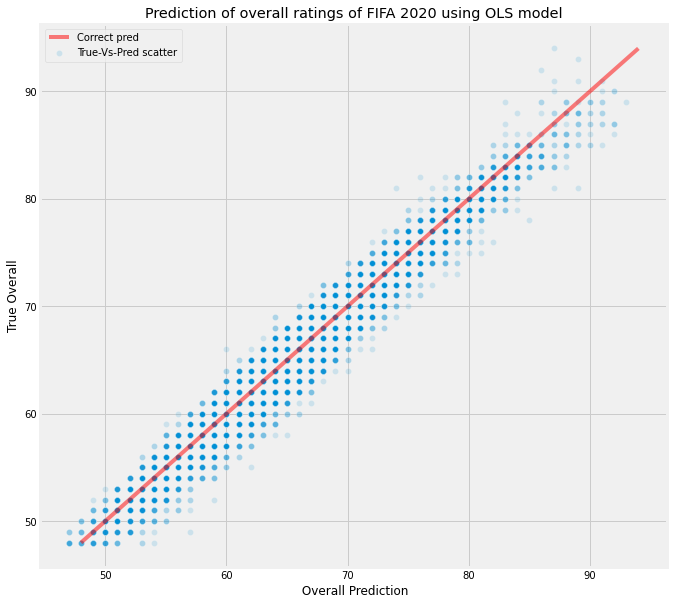

In [76]:
plt.figure(figsize=(10,10))
sb.scatterplot(pred_20, true_20, alpha=0.15)
plt.plot(true_20, true_20, color='r', alpha=0.5)
plt.legend(['Correct pred','True-Vs-Pred scatter'])
plt.title('Prediction of overall ratings of FIFA 2020 using OLS model')
plt.xlabel(' Overall Prediction')
plt.ylabel('True Overall');

## Player position classification:

In this section, we're going to train three models to classify players positions given their attributes. 

There 15 player positions in the dataset, we're going to group them in 4 categories: Goalkeeper, Defender, Midfielder, and Forward. This would facilitate the task without losing significant information about the player position.

We're going to proceed by tuning the hyper-parameters of these models in order to determine the optimal set of parameters for the task in hands.

### Decision Tree

In [77]:
# Creating categories based on players positions.

reduce_pos = {}
pos = list(df.team_position.unique())
new_pos = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
map_l = []
for i in pos:
    if i in ['CF','ST','LW','RW']:
        map_l.append((i,'Forward'))
    elif i in ['CM','RM','LM','CDM','CAM']:
        map_l.append((i,'Midfielder'))
    elif i in ['CB','RB','LB','LWB','RWB']:
        map_l.append((i,'Defender'))
    else:
        map_l.append((i,'Goalkeeper'))
for j in map_l:
    reduce_pos[j[0]]=j[1]
reduce_pos

{'CF': 'Forward',
 'LW': 'Forward',
 'RM': 'Midfielder',
 'ST': 'Forward',
 'GK': 'Goalkeeper',
 'LM': 'Midfielder',
 'CM': 'Midfielder',
 'CDM': 'Midfielder',
 'CB': 'Defender',
 'CAM': 'Midfielder',
 'RW': 'Forward',
 'RB': 'Defender',
 'LB': 'Defender',
 'LWB': 'Defender',
 'RWB': 'Defender'}

In [78]:
# Selecting features for the classification task.

l=[2015,2016,2017,2018,2019]
features_classification = ['skill_moves', 'pace', 'shooting', 'passing', 'dribbling','defending', 'physic', 
                           'attack_oa', 'skill_oa','movements_oa', 'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa']
classification_data = df.query('year in @l')[features_classification].copy()
y_class_label = df.query('year in @l')['team_position'].copy().map(reduce_pos)
y_class = y_class_label
display(classification_data)
y_class

,skill_moves,pace,shooting,passing,dribbling,defending,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa
0,4,93.0,89.0,86.0,96.0,27.0,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0
1,5,93.0,93.0,81.0,91.0,32.0,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0
2,4,93.0,86.0,83.0,92.0,32.0,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0
3,4,76.0,91.0,81.0,86.0,34.0,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82712,2,52.0,32.0,46.0,45.0,46.0,49.0,38.0,39.0,55.0,45.0,43.0,46.0,10.0
82713,2,64.0,43.0,40.0,52.0,23.0,53.0,41.0,42.0,61.0,54.0,37.0,22.0,11.0
82714,2,81.0,35.0,47.0,49.0,44.0,52.0,41.0,42.0,71.0,49.0,44.0,44.0,11.0
82715,2,63.0,42.0,38.0,50.0,41.0,56.0,42.0,36.0,62.0,55.0,42.0,41.0,13.0


0           Forward
1           Forward
2        Midfielder
3           Forward
4        Goalkeeper
            ...    
82712    Midfielder
82713       Forward
82714    Midfielder
82715      Defender
82716    Midfielder
Name: team_position, Length: 82717, dtype: object

In [79]:
# Train/Test splitting of the selected data.

X_train, X_test, y_train, y_test = train_test_split(classification_data, y_class, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((66173, 14), (16544, 14))

In [80]:
# Using cross-validation to tune the max leaf parameter of the decision tree.

param_grid = {'max_leaf_nodes': np.arange(5, 30)}
tree_classifier = DecisionTreeClassifier()
tree_CV = GridSearchCV(tree_classifier, param_grid, cv=5)
tree_CV.fit(X_train, y_train);

In [81]:
#View the accuracy score & the best parameters for the model found using grid search

print('Best score for training data:', tree_CV.best_score_,"\n")
print('Best nbr of neighbors:',tree_CV.best_params_,"\n")

Best score for training data: 0.8349628673930567 

Best nbr of neighbors: {'max_leaf_nodes': 29} 



In [82]:
# Select the optimal model and testing it.

tree_classifier = tree_CV.best_estimator_
tree_y_pred = tree_classifier.predict(X_test)

Training set score for decison tree: 0.837018
Testing set score for decision tree: 0.837403


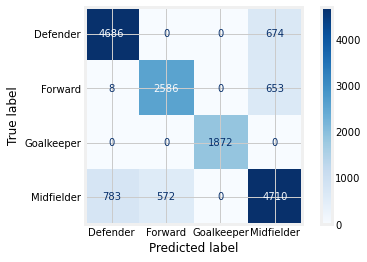

In [83]:
# Check the results of the test.

print("Training set score for decison tree: %f" % tree_classifier.score(X_train , y_train))
print("Testing set score for decision tree: %f" % tree_classifier.score(X_test , y_test))
plot_confusion_matrix(tree_classifier, X_test, y_test, cmap='Blues');

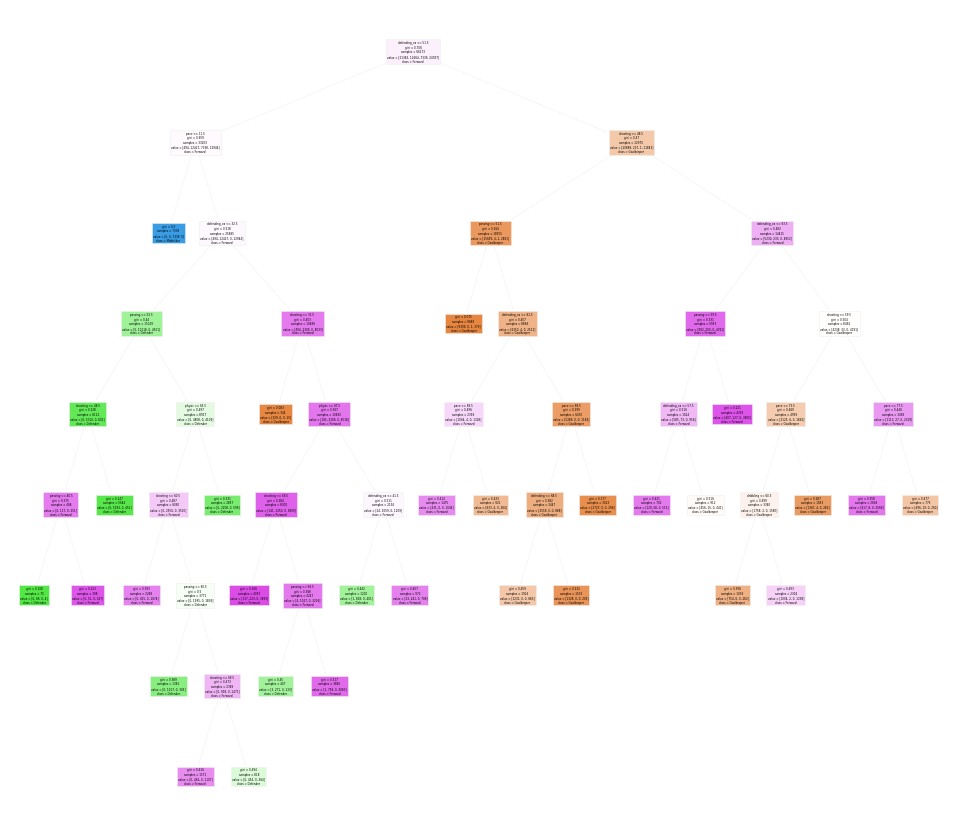

In [84]:
# Plot the decision tree.

plt.figure(figsize=(15,15))
plot_tree(tree_classifier, feature_names=list(classification_data.columns) ,class_names=new_pos, filled=True);

In [85]:
# Check random predictions made on the test set.

l_true=list(y_test)
l_pred=list(tree_y_pred)
temp={
    'true_position': l_true,
    'predicted_position': l_pred
}
result = pd.DataFrame(temp)
result.sample(10)

,true_position,predicted_position
7172,Forward,Forward
9302,Forward,Midfielder
4690,Goalkeeper,Goalkeeper
16422,Midfielder,Midfielder
5308,Defender,Defender
9586,Midfielder,Forward
12818,Forward,Forward
2336,Forward,Forward
9365,Goalkeeper,Goalkeeper
14195,Midfielder,Forward


In [86]:
# Test the decision trained tree model on the FIFA 20 data.

X_20 = df20[features_classification].copy()
y_20 = df20['team_position'].copy().map(reduce_pos)
tree_y20_pred = tree_classifier.predict(X_20)

Accuracy: 0.8326403326403327


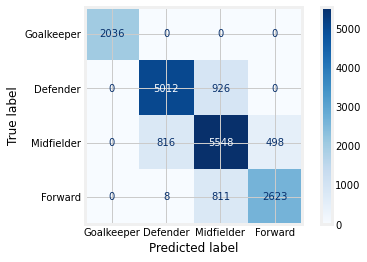

In [87]:
# Check results

print('Accuracy:', accuracy_score(y_20, tree_y20_pred))
plot_confusion_matrix(tree_classifier, X_20, y_20, labels=['Goalkeeper','Defender','Midfielder','Forward'], cmap='Blues');

### KNN classification

In [88]:
# Map positions to integers.

pos_dic={'Goalkeeper': 0, 'Defender': 1, 'Midfielder':2, 'Forward':3}
y_train = y_train.map(pos_dic)
y_test = y_test.map(pos_dic)
y_test

11273    2
35750    0
47570    1
56088    2
38462    1
        ..
1243     2
62285    2
56877    2
26533    3
4203     3
Name: team_position, Length: 16544, dtype: int64

In [89]:
# Use cross-validation to tune the neighbors number parameter of the KNN model. 

param_grid = {'n_neighbors': np.arange(1, 25)}
KNN_classifier = KNeighborsClassifier()
KNN_CV = GridSearchCV(KNN_classifier, param_grid, cv=5)
KNN_CV.fit(X_train, y_train);

In [90]:
#View the accuracy score & best parameters for the model found using grid search.

print('Best score for training data:', KNN_CV.best_score_,"\n")
print('Best nbr of neighbors:',KNN_CV.best_params_,"\n")

Best score for training data: 0.8703852031598384 

Best nbr of neighbors: {'n_neighbors': 17} 



In [91]:
# Select the optimal KNN model.

KNN_classifier = KNN_CV.best_estimator_
y_pred = KNN_classifier.predict(X_test)

Training set score for KNN: 0.885497
Testing set score for KNN: 0.877660


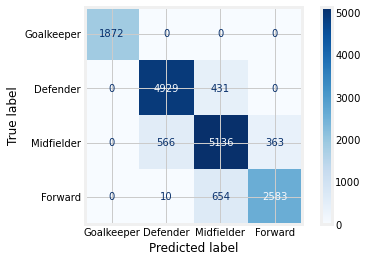

In [92]:
# View the score on the test set.

print("Training set score for KNN: %f" % KNN_classifier.score(X_train , y_train))
print("Testing set score for KNN: %f" % KNN_classifier.score(X_test , y_test))
plot_confusion_matrix(KNN_classifier, X_test, y_test, display_labels=['Goalkeeper','Defender','Midfielder','Forward'], cmap='Blues');

Accuracy: 0.8673815515920779


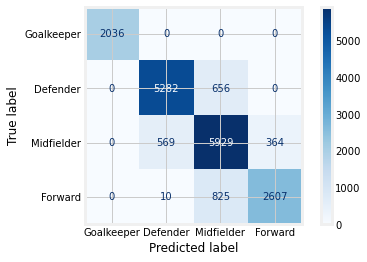

In [93]:
# Testing the trained KNN model on the FIFA 20 data.

KNN_y20_pred = KNN_classifier.predict(X_20)
y_20_int_label = y_20.map(pos_dic)
print('Accuracy:', accuracy_score(y_20_int_label, KNN_y20_pred))
plot_confusion_matrix(KNN_classifier, X_20, y_20_int_label, display_labels=['Goalkeeper','Defender','Midfielder','Forward'], cmap='Blues');

### SVM classification

In [94]:
# Scaling data.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The selection of the parameters Gamma and C for the SVM model with an RBF kernel has been done using GridSearchCV with 5 folds. To maintain a lower execution time for this notebook we're going to use the optimal parameters directly, however one can reproduce them using the following lines of code:
> params_grid = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3],'C': [1, 10, 100, 1000]}]<br>
 svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)<br>
 svm_model.fit(X_train_scaled, y_train)<br> #View the accuracy score<br>
 print('Best score for training data:', svm_model.best_score_,"\n")<br> #View the best parameters for the model found using grid search<br>
 print('Best C:',svm_model.best_estimator_.C,"\n") <br>
 print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")<br>
 print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")<br>
 final_SVM_model = svm_model.best_estimator_
 

In [95]:
# Optimal parameters.

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-1],'C': [100]}]

In [96]:
# Train and SVM model using the optimal parameters.

optimal_SVM_model = svm.SVC(C=100, kernel='rbf', gamma=1e-1,)
optimal_SVM_model.fit(X_train_scaled, y_train);

In [97]:
# View results.

print("Training set score for SVM: %f" % optimal_SVM_model.score(X_train_scaled , y_train))
print("Testing set score for SVM: %f" % optimal_SVM_model.score(X_test_scaled  , y_test))

Training set score for SVM: 0.895562
Testing set score for SVM: 0.891985


Accuracy: 0.8919850096711799


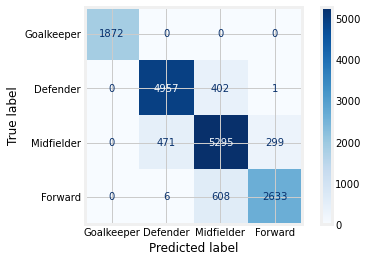

In [98]:
# Test the trained model, and view results.

SVM_y_pred = optimal_SVM_model.predict(X_test_scaled)
print('Accuracy:',accuracy_score(y_test, SVM_y_pred))
plot_confusion_matrix(optimal_SVM_model, X_test_scaled, y_test, display_labels=['Goalkeeper','Defender','Midfielder','Forward'], cmap='Blues');

In [99]:
# Generate the classification report.

inv_pos_dic={ 0:'Goalkeeper',  1:'Defender', 2:'Midfielder', 3:'Forward'}
y_test_label = pd.Series(y_test).map(inv_pos_dic)
y_pred_label = pd.Series(SVM_y_pred).map(inv_pos_dic)

print(classification_report(y_test_label,y_pred_label))

              precision    recall  f1-score   support

    Defender       0.91      0.92      0.92      5360
     Forward       0.90      0.81      0.85      3247
  Goalkeeper       1.00      1.00      1.00      1872
  Midfielder       0.84      0.87      0.86      6065

    accuracy                           0.89     16544
   macro avg       0.91      0.90      0.91     16544
weighted avg       0.89      0.89      0.89     16544



Accuracy: 0.8824269613743297


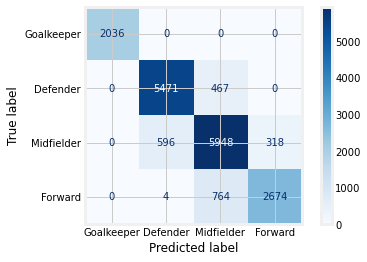

In [100]:
# Test the final model on the FIFA 20 data.

X_20_scaled = scaler.fit_transform(X_20)
SVM_y20_pred = optimal_SVM_model.predict(X_20_scaled)
print('Accuracy:', accuracy_score(y_20_int_label, SVM_y20_pred))
plot_confusion_matrix(optimal_SVM_model, X_20_scaled, y_20_int_label, display_labels=['Goalkeeper','Defender','Midfielder','Forward'], cmap='Blues');

## Summary of Decision Tree vs KNN vs SVM for player postion prediction

After training each of the three models on 80% of the data of FIFA 15, 16 ,17, 18 and 19. The 3 models are used to predict the players positions of FIFA 20. Below are the results of each model:

**Accuracy and R2 score:**

In [101]:
acc_tree = accuracy_score(y_20, tree_y20_pred)
acc_KNN = accuracy_score(y_20_int_label, KNN_y20_pred)
acc_SVM = accuracy_score(y_20_int_label, SVM_y20_pred)

r2_tree = r2_score(pd.Series(y_20).map(pos_dic), pd.Series(tree_y20_pred).map(pos_dic))
r2_KNN = r2_score(y_20_int_label, KNN_y20_pred)
r2_SVM = r2_score(y_20_int_label, SVM_y20_pred)

acc_l=[acc_tree, acc_KNN, acc_SVM]
r2_l=[r2_tree, r2_KNN, r2_SVM]
index_l=['Decision_Tree', 'KNN', 'SVM']
df_acc = pd.DataFrame(list(zip(acc_l, r2_l)), index =index_l, columns =['Accuracy', 'R2_score']) 
df_acc

,Accuracy,R2_score
Decision_Tree,0.832640,0.796688
KNN,0.867382,0.838168
SVM,0.882427,0.857490


**Confusion Matrices:**

In [102]:
tree_cm = confusion_matrix(y_20, tree_y20_pred, normalize='true')
KNN_cm = confusion_matrix(y_20_int_label, KNN_y20_pred, normalize='true')
SVM_cm = confusion_matrix(y_20_int_label, SVM_y20_pred, normalize='true')

def plot_cm(mat,y_ture,ax,case):
    if case == 0:
        df_cm = pd.DataFrame(mat, columns=np.unique(y_ture), index = np.unique(y_ture))
        df_cm.index.name = 'True Label'
        df_cm.columns.name = 'Predicted Label'
        sb.heatmap(df_cm, cmap="Blues", cbar=False, annot=True,annot_kws={"size": 10}, ax=ax)
        plt.yticks(fontsize=10)
        plt.xticks(fontsize=10)
    else:
        l_lab=['Goalkeeper','Defender','Midfielder','Forward']
        df_cm = pd.DataFrame(mat, columns=np.array(l_lab), index = np.unique(l_lab))
        df_cm.index.name = 'True Label'
        df_cm.columns.name = 'Predicted Label'
        sb.heatmap(df_cm, cmap="Blues", cbar=False, annot=True,annot_kws={"size": 10}, ax=ax)
        plt.yticks(fontsize=10)
        plt.xticks(fontsize=10)

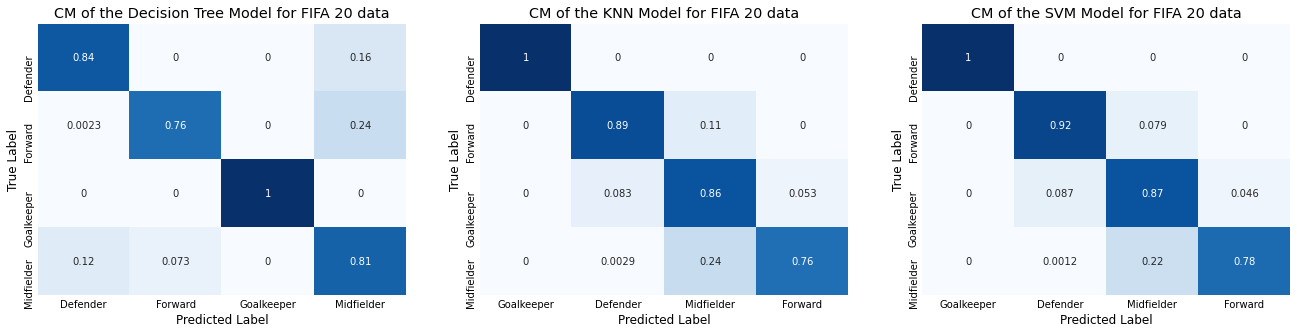

In [103]:
plt.figure(figsize=(20,5))
plt.tight_layout()
ax1 = plt.subplot(131)
plt.title('CM of the Decision Tree Model for FIFA 20 data')
plot_cm(tree_cm, y_20, ax1,0)
ax2 = plt.subplot(132)
plt.title('CM of the KNN Model for FIFA 20 data')
plot_cm(KNN_cm, y_20, ax2,1)
ax3 = plt.subplot(133)
plt.title('CM of the SVM Model for FIFA 20 data')
plot_cm(SVM_cm, y_20, ax3,1)

In [104]:
cols = {'0':'Goalkeeper', '1':'Defender', '2': 'Midfielder', '3':'Forward'}
print('Classification report of the decision tree model for the FIFA 2020 data:')
display(pd.DataFrame(classification_report(y_20, tree_y20_pred, output_dict=True)))
print('Classification report of the KNN model for the FIFA 2020 data:')
display(pd.DataFrame(classification_report(y_20_int_label, KNN_y20_pred, output_dict=True)).rename(columns=cols))
print('Classification report of the SVM model for the FIFA 2020 data:')
display(pd.DataFrame(classification_report(y_20_int_label, SVM_y20_pred, output_dict=True)).rename(columns=cols))

Classification report of the decision tree model for the FIFA 2020 data:


,Defender,Forward,Goalkeeper,Midfielder,accuracy,macro avg,weighted avg
precision,0.858807,0.840436,1.0,0.761565,0.83264,0.865202,0.834568
recall,0.844055,0.762057,1.0,0.808511,0.83264,0.853656,0.832640
f1-score,0.851367,0.799330,1.0,0.784336,0.83264,0.858758,0.832959
support,5938.000000,3442.000000,2036.0,6862.000000,0.83264,18278.000000,18278.000000


Classification report of the KNN model for the FIFA 2020 data:


,Goalkeeper,Defender,Midfielder,Forward,accuracy,macro avg,weighted avg
precision,1.0,0.901211,0.800135,0.877482,0.867382,0.894707,0.869800
recall,1.0,0.889525,0.864034,0.757408,0.867382,0.877742,0.867382
f1-score,1.0,0.895330,0.830858,0.813036,0.867382,0.884806,0.867288
support,2036.0,5938.000000,6862.000000,3442.000000,0.867382,18278.000000,18278.000000


Classification report of the SVM model for the FIFA 2020 data:


,Goalkeeper,Defender,Midfielder,Forward,accuracy,macro avg,weighted avg
precision,1.0,0.901169,0.828528,0.893717,0.882427,0.905853,0.883503
recall,1.0,0.921354,0.866803,0.776874,0.882427,0.891258,0.882427
f1-score,1.0,0.911150,0.847233,0.831209,0.882427,0.897398,0.881997
support,2036.0,5938.000000,6862.000000,3442.000000,0.882427,18278.000000,18278.000000


**Breaking news:** After a very hard fixture, the SVM team emerged victorious and won the 2020 league title with 88% accuracy, KNN team came second place with 86% accuracy and DT team in third place with 84% accuracy. 

If you like this notebook, please feel free to **UPVOTE**! Leave Comment below for your suggestions on how to improve.